**Definir uso da GPU**

Menu superior: "Ambiente de execução" <br>
Linha:         "Alterar tipo do ambiente de execução <br>
Opção:         "hosted environment" <br>


**Setup Fast.AI**

-U, --upgrade  Upgrade all specified packages to the newest available version. The handling of dependencies depends on the upgrade-strategy used.

-q, --quiet   Give less output. Option is additive, and can be used up to 3 times (corresponding to WARNING, ERROR, and CRITICAL logging levels).


In [208]:
#!pip install fastai --upgrade
from fastai.vision.all import *
from fastai.vision.widgets import *

In [ ]:
!ls gdrive/MyDrive/models

ls: cannot access 'gdrive/MyDrive/models/Export': No such file or directory


# **PREPARAÇÃO DE DADOS**


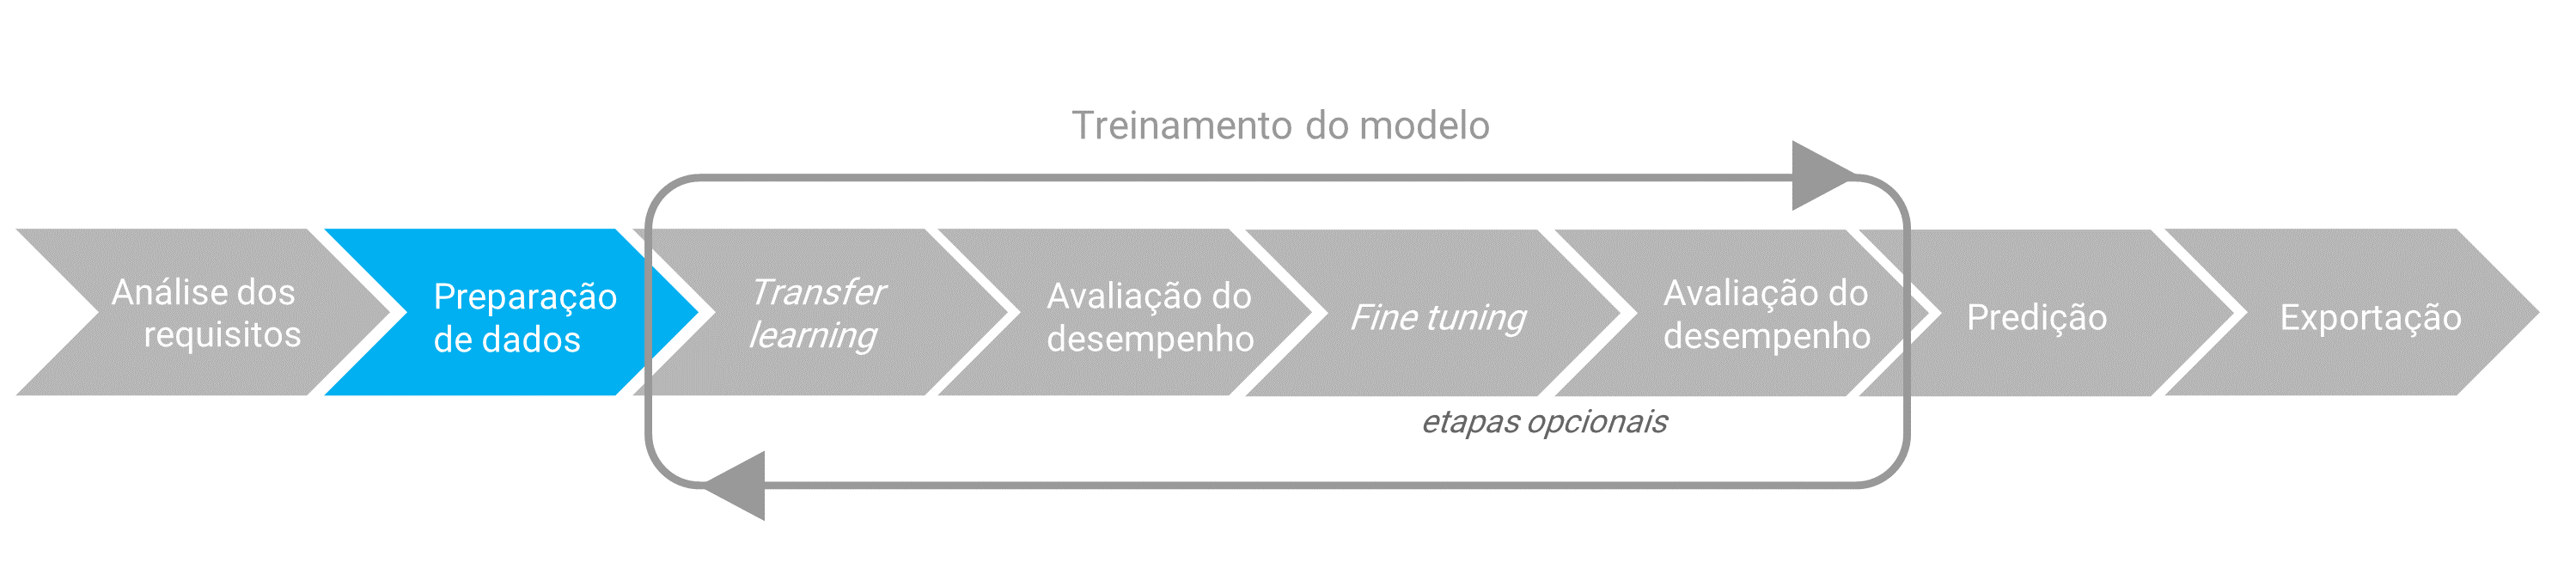

**Montar acesso aos dados no GDRIVE/Upload de dados**
Importante: o dataset deve estar no seu Google drive na mesma pasta desse notebook com uma pasta incluindo todas as imagens

In [6]:
#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)
#root_dir = 'gdrive/MyDrive/'
global base_dir
from pathlib import Path
import os
#base_dir = root_dir + 'TCC Matheus/imagens lagartas/dataset-jupyter/train'
root_dir =  'augmented-dataset-1500'
base_dir = os.path.join(root_dir, 'train')
path=Path(base_dir)
print(path)
os.listdir(path)
basedir=path

augmented-dataset-1500/train


Visualizar as características do conjunto de dados



In [3]:
from collections import Counter
import os

global base_dir
path=Path(base_dir)

class_counter = Counter()
extension_counter = Counter()
total_images = 0


for subdir, _, files in os.walk(path):
    for file_name in files:
        total_images += 1

        class_name = os.path.basename(subdir)
        class_counter[class_name] += 1


        file_extension = os.path.splitext(file_name)[-1]
        extension_counter[file_extension] += 1


print("Contagem de classes:", class_counter)
print("Contagem de extensões:", extension_counter)
print("Contagem total de imagens:", total_images)

Contagem de classes: Counter({'acharia': 1500, 'phobetron': 1500, 'hylesia': 1500, 'arctiidae': 1500, 'lonomia': 1500, 'nao-peconhenta': 1500, 'automeris': 1500, 'nao-lagarta': 1500, 'megalopyge': 1500, 'podalia': 1500})
Contagem de extensões: Counter({'.jpg': 15000})
Contagem total de imagens: 15000


In [5]:
from pathlib import Path
import os
path = Path(base_dir)

listy = [f for f in path.iterdir()]
total = 0
dicty = {}

for i in listy:
    if i.is_dir():
        num_files = len([f for f in i.iterdir()])
        print(f"there are {num_files} files in {i}!")

        file_types_count = {}
        for filename in i.iterdir():
            file_extension = filename.suffix
            if file_extension in file_types_count:
                file_types_count[file_extension] += 1
            else:
                file_types_count[file_extension] = 1
        print(f"File types in {i}: {file_types_count}")

        total += num_files
        folder_name = i.name
        dicty[folder_name] = num_files

print(f"there are {total} files in total!")

NameError: name 'base_dir' is not defined

OPCIONAL: Converter todas as imagens para jpg e colocando o nome da pasta (espécie de mosquito) como nome da imagem

In [ ]:
from PIL import Image
import os
import progressbar
global base_dir

def convert_jpgs(path):
    if path == "":
        path = base_dir + path
    listy = os.listdir(path)
    for file in progressbar.progressbar(listy):
        if os.path.isdir(path+"/"+file):
            convert_jpgs(path+"/"+file)
        elif not file.split(".")[1] == "jpg":
            Image.open(path + "/" + file).convert('RGB').save("{0}/{1}.jpg".format(path,file.split(".")[0]))

def clear_non_jpg(path):
    if path == "":
        path = base_dir + path
    listy = os.listdir(path)
    for file in progressbar.progressbar(listy):
        if os.path.isdir(path+"/"+file):
            clear_non_jpg(path+"/"+file)
        elif not file.split(".")[1] == "jpg":
            os.remove(path + "/" + file)


convert_jpgs("")
clear_non_jpg("")

100% (665 of 665) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (637 of 637) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (755 of 755) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (837 of 837) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (376 of 376) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (577 of 577) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (660 of 660) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (711 of 711) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (852 of 852) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (500 of 500) |######################| Elapsed Time: 0:00:55 Time:  0:00:55
100% (10 of 10) |########################| Elapsed Time: 0:00:56 Time:  0:00:56
100% (1 of 1) |##########################| Elapsed Time: 0:00:56 Time:  0:00:56
100% (665 of 665) |#####################

In [ ]:
#Pegando todas as imagens no path

get_files(path)

(#10000) [Path('gdrive/MyDrive/output augmentation/augmented-dataset-1k/train/arctiidae/arctiidae_original_arctiidae_62.jpg_303f071e-f844-4bc4-b301-c1f6f8bd13d6.jpg'),Path('gdrive/MyDrive/output augmentation/augmented-dataset-1k/train/arctiidae/arctiidae_original_arctiidae_162.jpg_0746eb5b-ca20-42b7-859e-8d0df556448b.jpg'),Path('gdrive/MyDrive/output augmentation/augmented-dataset-1k/train/arctiidae/arctiidae_original_arctiidae_237.jpg_84555927-be6f-49fd-a97e-bb12f20fed93.jpg'),Path('gdrive/MyDrive/output augmentation/augmented-dataset-1k/train/arctiidae/arctiidae_original_arctiidae_77(1).jpg_272bac39-c4da-4e56-a1bb-cfca05d13e54.jpg'),Path('gdrive/MyDrive/output augmentation/augmented-dataset-1k/train/arctiidae/arctiidae_original_arctiidae_150.jpg_9f505da8-0372-4db8-9438-7a905cd3f984.jpg'),Path('gdrive/MyDrive/output augmentation/augmented-dataset-1k/train/arctiidae/arctiidae_original_arctiidae_87(1).jpg_eb705055-960e-4fc7-87c0-a848ba80f411.jpg'),Path('gdrive/MyDrive/output augmentatio

Criando o DataBlock

RandomSplitter: divide o conjunto de imagens em conjunto de treinamento e validação de forma randômica, com p.ex. 20% das imagens para o conjunto de validação (valid_pct=0.2) usando optionalmente um seed para receber a mesma divisão do conjunto em várias rodadas.

item_tfms: transformação de itens é aplicada aos itens (imagens) individuais. Tipicamente isto inclui o Resize de todas as imagens para  um tamanho fixo p.ex. 224x224 pixels. Fastai fornece 3 metodos de resize: crop, squish e pad. (https://docs.fast.ai/vision.augment.html#Resize-with-crop,-pad-or-squish)(Section Presizing: https://github.com/fastai/fastbook/blob/cf9fae191ce1055737d806b2001123955194ca2a/05_pet_breeds.ipynb)

batch_tfms: transformação de batch é aplicada a cada batch. São aplicadas ao batch também as data augmentations para prevenir overfitting. Existem diveros tipos de augmentação de dados (https://docs.fast.ai/vision.augment.html)

Valores default: aug_transforms(mult=1.0, do_flip=True, flip_vert=False, max_rotate=10.0, min_zoom=1.0, max_zoom=1.1, max_lighting=0.2, max_warp=0.2, p_affine=0.75, p_lighting=0.75, xtra_tfms=None, size=None, mode='bilinear', pad_mode='reflection', align_corners=True, batch=False, min_scale=1.0)

https://muellerzr.github.io/fastblog/datablock/2020/03/21/DataBlockAPI.html

In [7]:
lagartas = DataBlock(blocks=(ImageBlock, CategoryBlock),
                 get_items=get_image_files,
                 splitter=RandomSplitter(seed=42, valid_pct=0.1),
                 get_y=parent_label,
                 item_tfms=Resize(460),
                 batch_tfms=(aug_transforms(size=224)))

Mostrar informação referente a divisão do conjunto de dados em conjunto de treinamento e validação  (#quantidade de imagens por set, no. da localizaçao entre os nomes dos arquivos das imagens em cada conjunto)

In [ ]:
fnames = get_image_files(path)
print(fnames)
lagartas.splitter(fnames)

In [ ]:
lagartas.summary(path, show_batch=True)

Criar o dataloader (https://docs.fast.ai/data.core.html#Datasets.dataloaders)

In [8]:

batch_size = 16
dls = lagartas.dataloaders(path, bs=batch_size, item_tfms=Resize(224), batch_tfms=aug_transforms(size=224))

/home/matheus/anaconda3/envs/gpu_env/lib/python3.9/site-packages/torch/cuda/__init__.py:141: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at /opt/conda/conda-bld/pytorch_1711403380164/work/c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0


In [6]:
#Verificar nomes das categorias

dls.vocab

['acharia', 'arctiidae', 'automeris', 'hylesia', 'lonomia', 'megalopyge', 'nao-lagarta', 'nao-peconhenta', 'phobetron', 'podalia']

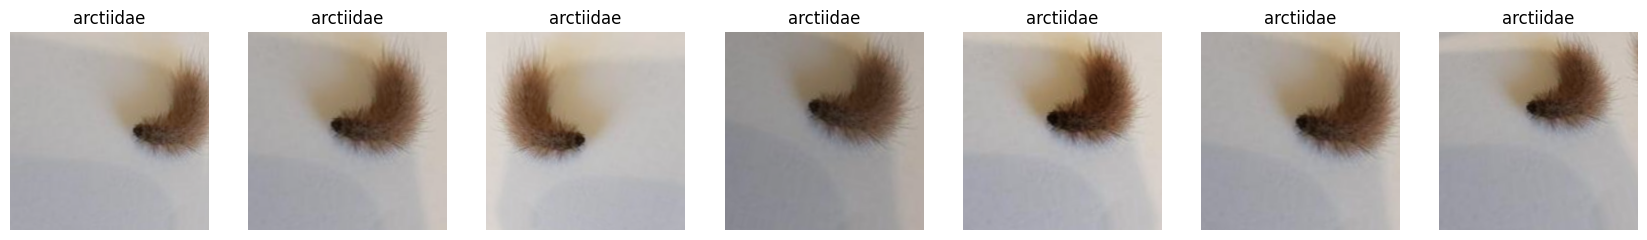

In [ ]:
#Mostrar os resultados de diversos transformações da mesma imagem

dls.train.show_batch(max_n=7, nrows=1, unique=True)

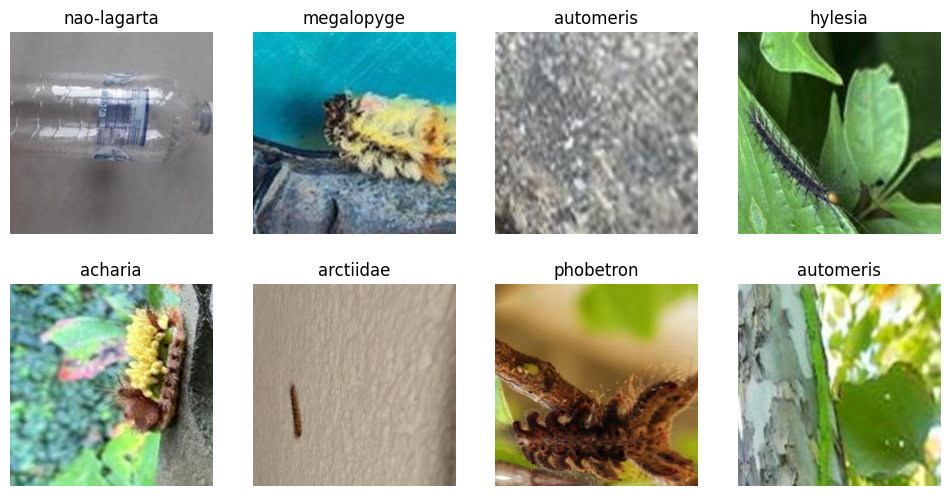

In [ ]:
#Mostrar exemplos do batch

dls.show_batch(max_n=16)

# **TRANSFER LEARNING - TREINAMENTO (RESNET18)**
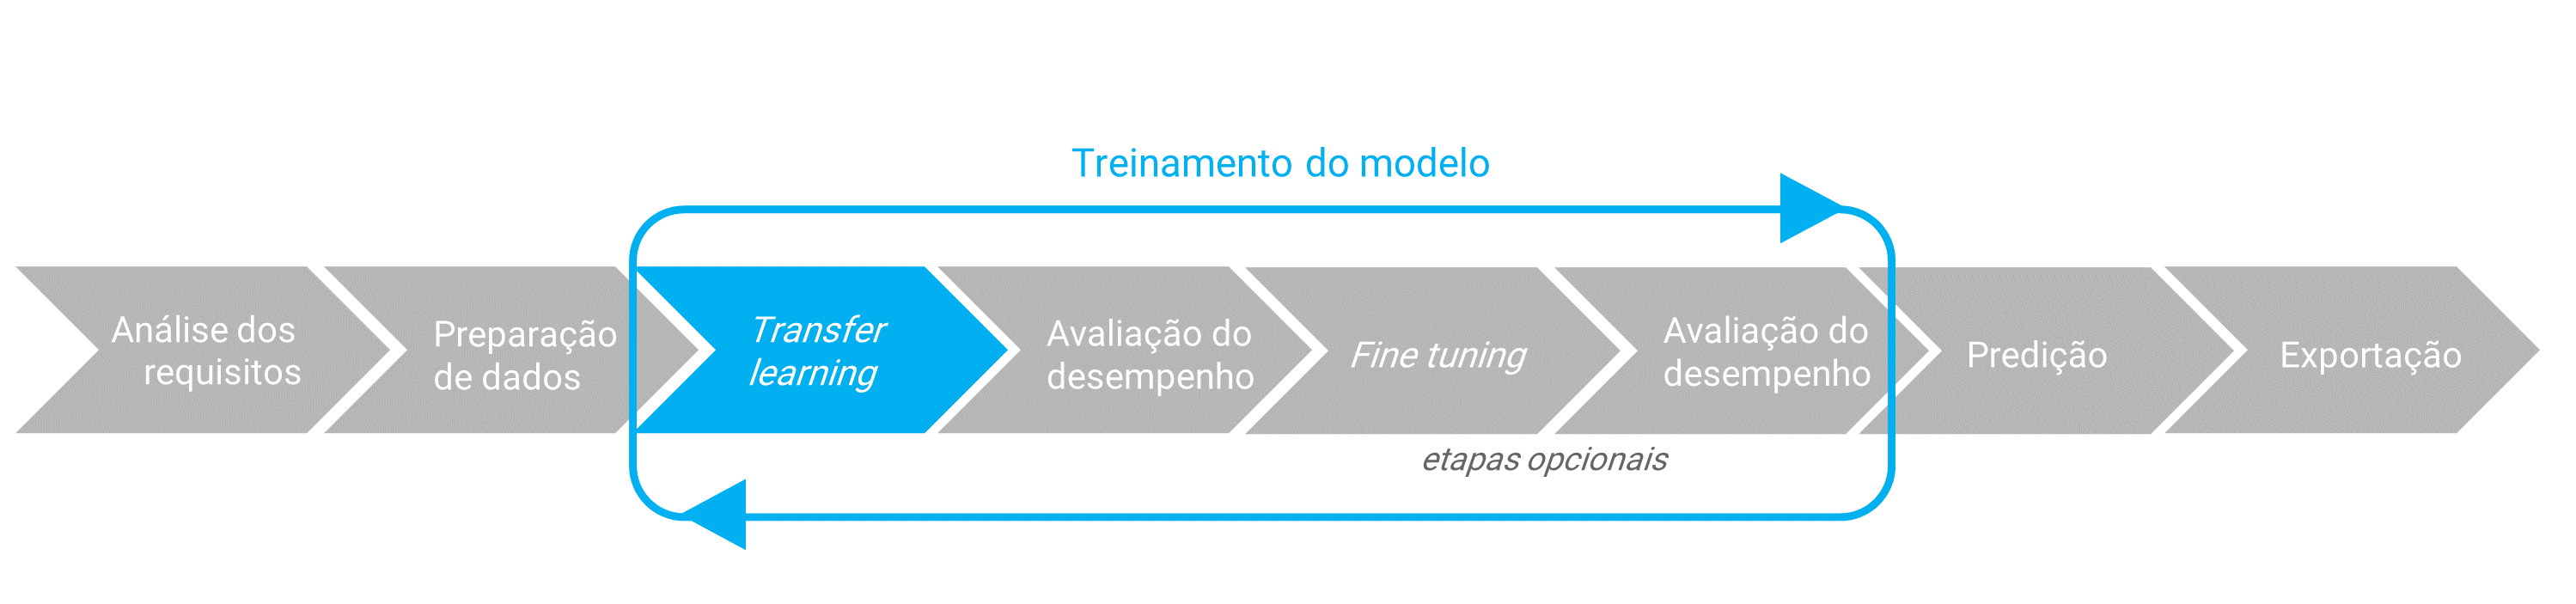

**Setup da biblioteca TIMM**

A biblioteca TIMM fornece acesso a mais do que 200 modelos pretreinados

https://timm.fast.ai/

Infos sobre as implementações dos modelos: https://rwightman.github.io/pytorch-image-models/models/

In [ ]:
!pip install timm

In [5]:
import timm

In [13]:
timm.__version__

'0.9.16'

## **TREINANDO O RESNET18**

In [8]:
from fastai.vision.all import *

In [160]:
#Criar o modelo a partir da biblioteca TIMM https://timm.fast.ai/create_model

model_transfer = timm.create_model('resnet18', pretrained=True,num_classes=10)

In [11]:
cbs=[ActivationStats(with_hist=True)]

In [161]:
#Criar o Learner no fastai
#cbs=[ShowGraphCallback,ActivationStats(with_hist=True),SaveModelCallback('monitor='accuracy',fname='/content/gdrive/Shareddrives/CnE_Mosquitos/JupyterNotebooks/ProjetoMLMosquito/Export/bestResnet18Model')]

#Wandb.ai callback: https://docs.fast.ai/callback.wandb.html

learn = Learner(dls, model_transfer,metrics=accuracy, cbs=ShowGraphCallback())

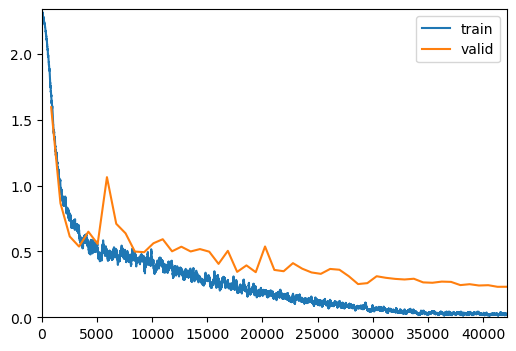

In [11]:
#Treinar o modelo com fit_one_cycle

learn.fit_one_cycle(50, 1e-3)

In [12]:
learn.save('FastAI_timm_COM_TESTE_RESNET18_LEARNING_RATE_001_EPOCHS_50')

Path('models/FastAI_timm_COM_TESTE_RESNET18_LEARNING_RATE_001_EPOCHS_50.pth')

In [162]:
learn = learn.load('FastAI_timm_COM_TESTE_RESNET18_LEARNING_RATE_001_EPOCHS_50')

## **AVALIAÇÃO DO MODELO CRIADO RESNET 18**


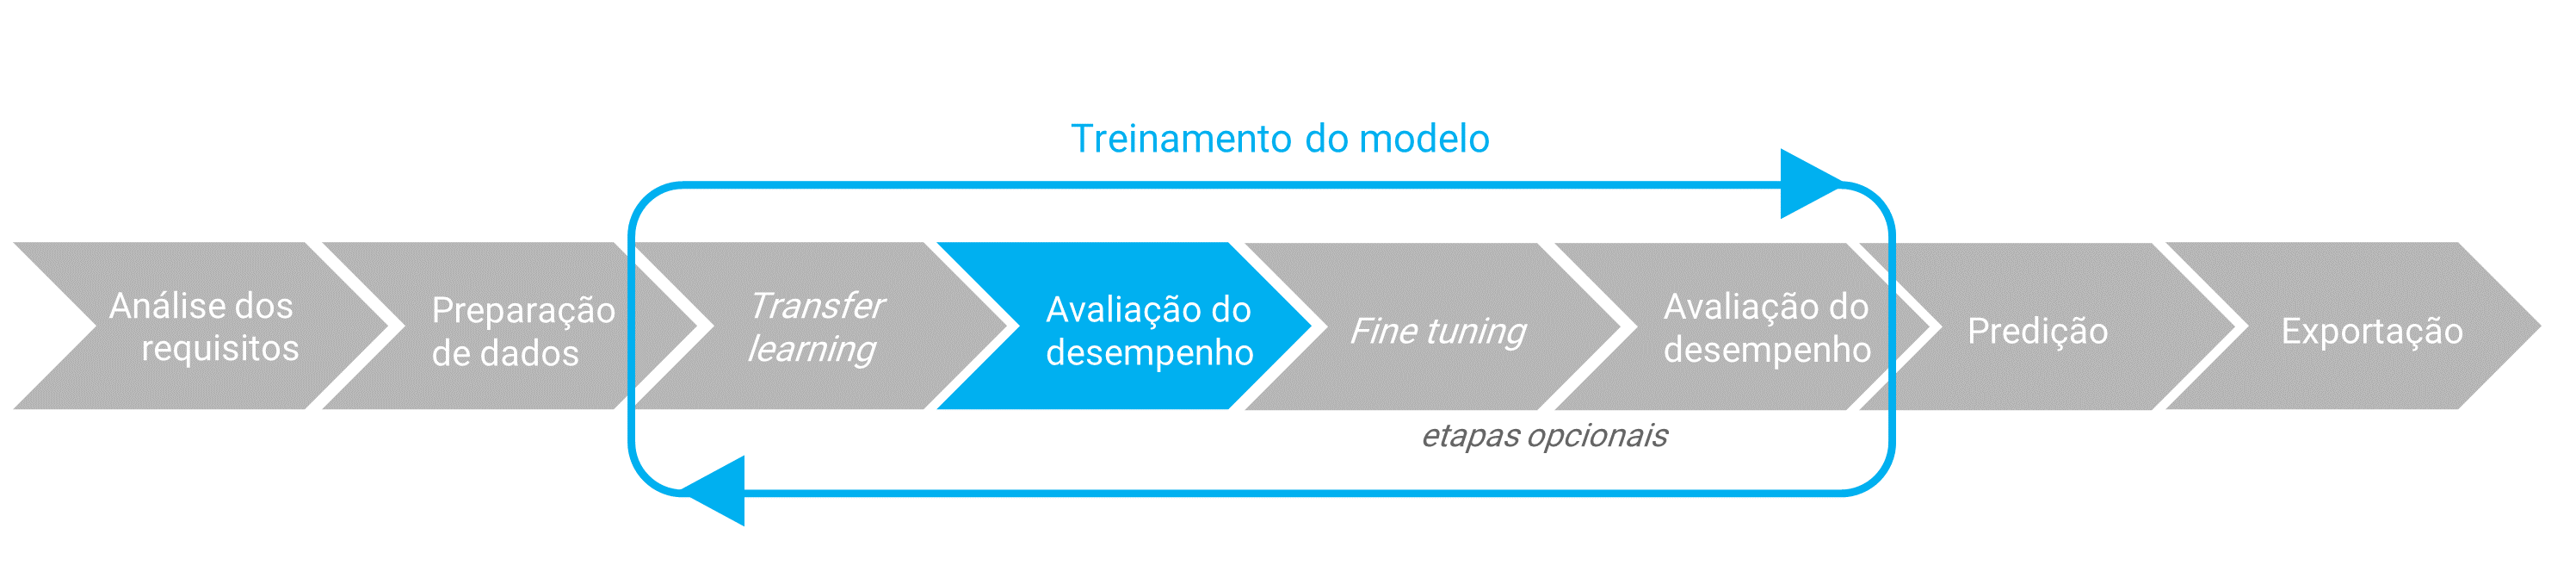

In [14]:
from sklearn.metrics import accuracy_score

# Calcular a acurácia de treinamento
preds, targs = learn.get_preds(dl=dls.train)

accuracy = accuracy_score(targs, preds.argmax(dim=-1))
print(f"Acurácia de Treinamento: {accuracy * 100:.2f}%")

Acurácia de Treinamento: 99.55%


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

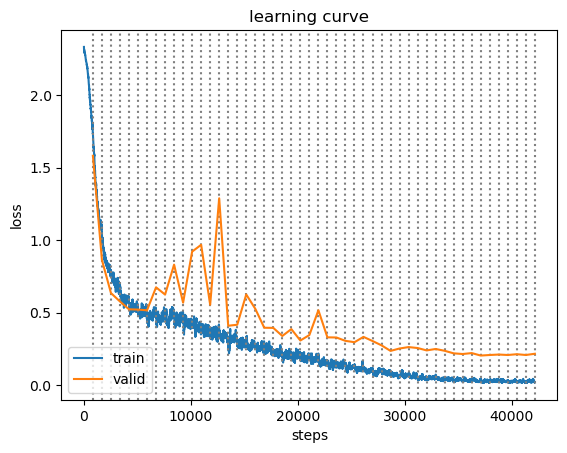

In [13]:
learn.recorder.plot_loss()

**Avaliação da acurácia, precisão, recall e F1 score**

Accuracy tells you how many times the ML model was correct overall. Precision is how good the model is at predicting a specific category. Recall tells you how many times the model was able to detect a specific category.

Mais infos: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://www.mage.ai/blog/definitive-guide-to-accuracy-precision-recall-for-product-developers

https://regenerativetoday.com/learn-precision-recall-and-f1-score-of-multiclass-classification-in-depth/


In [75]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()

                precision    recall  f1-score   support

       acharia       0.94      0.97      0.96       148
     arctiidae       0.95      0.94      0.94       170
     automeris       0.96      0.94      0.95       140
       hylesia       0.95      0.92      0.94       176
       lonomia       0.97      1.00      0.98       149
    megalopyge       0.94      0.82      0.88       134
   nao-lagarta       0.96      0.98      0.97       134
nao-peconhenta       0.91      0.92      0.91       125
     phobetron       0.97      0.97      0.97       152
       podalia       0.89      0.96      0.92       172

      accuracy                           0.94      1500
     macro avg       0.94      0.94      0.94      1500
  weighted avg       0.94      0.94      0.94      1500



INFO: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

Matriz de confusão

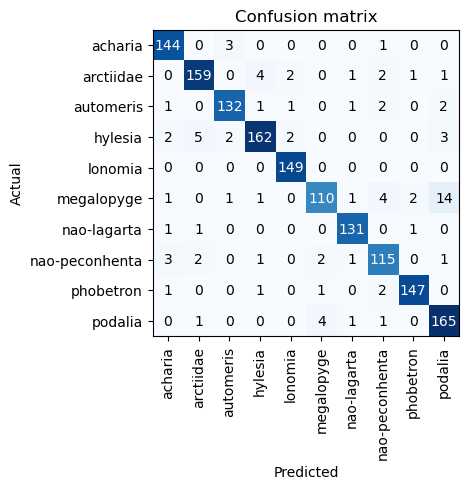

In [76]:
interp.plot_confusion_matrix()

https://search.r-project.org/CRAN/refmans/fastai/html/most_confused.html


In [ ]:
interp.most_confused(min_val=2)

[('megalopyge', 'podalia', 9),
 ('podalia', 'megalopyge', 9),
 ('arctiidae', 'nao-peconhenta', 7),
 ('nao-peconhenta', 'automeris', 6),
 ('nao-peconhenta', 'acharia', 5),
 ('megalopyge', 'phobetron', 4),
 ('phobetron', 'megalopyge', 4),
 ('arctiidae', 'hylesia', 3),
 ('automeris', 'nao-lagarta', 3),
 ('megalopyge', 'arctiidae', 3),
 ('phobetron', 'nao-peconhenta', 3),
 ('acharia', 'arctiidae', 2),
 ('arctiidae', 'megalopyge', 2),
 ('arctiidae', 'podalia', 2),
 ('hylesia', 'acharia', 2),
 ('hylesia', 'lonomia', 2),
 ('megalopyge', 'acharia', 2),
 ('megalopyge', 'hylesia', 2),
 ('nao-peconhenta', 'arctiidae', 2),
 ('nao-peconhenta', 'hylesia', 2),
 ('nao-peconhenta', 'megalopyge', 2),
 ('nao-peconhenta', 'nao-lagarta', 2),
 ('podalia', 'arctiidae', 2)]

In [ ]:
#interp = Interpretation.from_learner(learn)

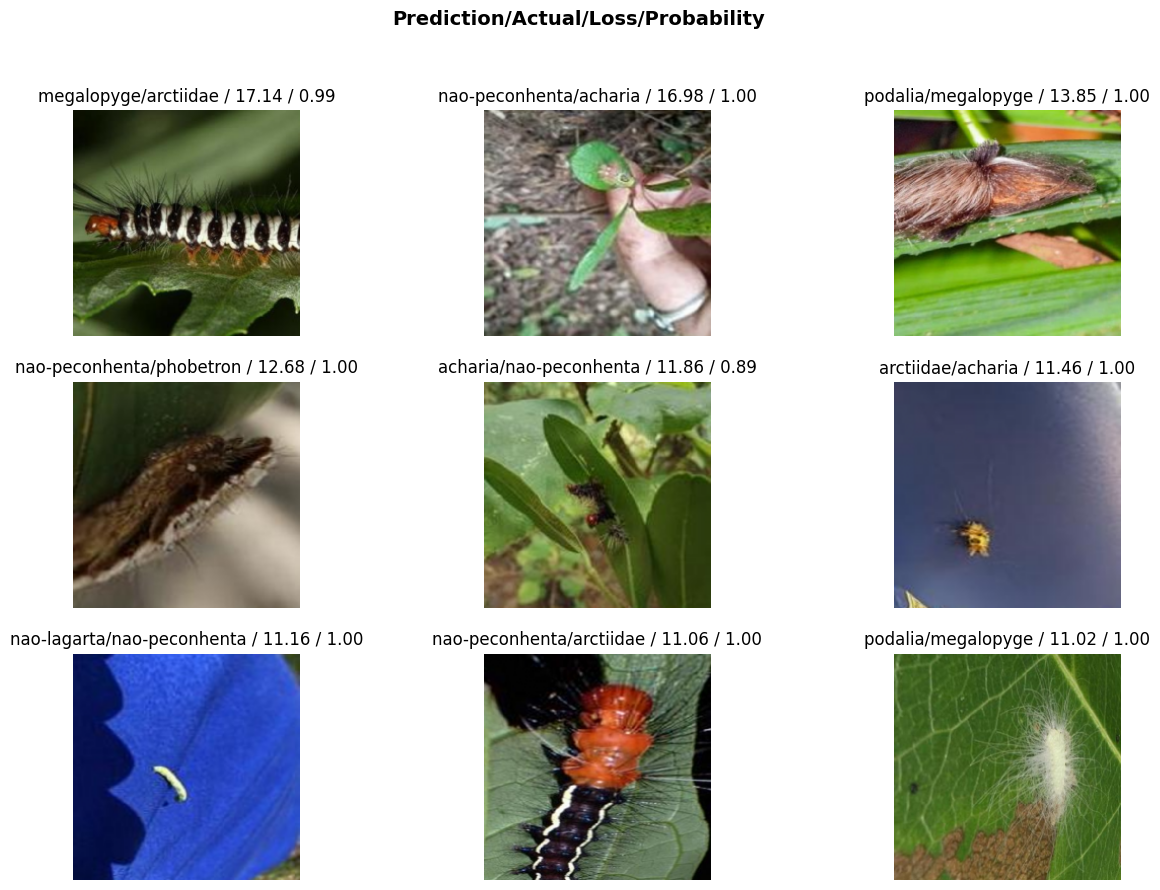

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

**Limpeza de dados**

IMPORTANTE: As imagens deletadas aqui serão deletadas permanentemente na origem do conjunto de dados no Google Drive!

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

## **FINE-TUNING DO MODELO CRIADO RESNET 18**
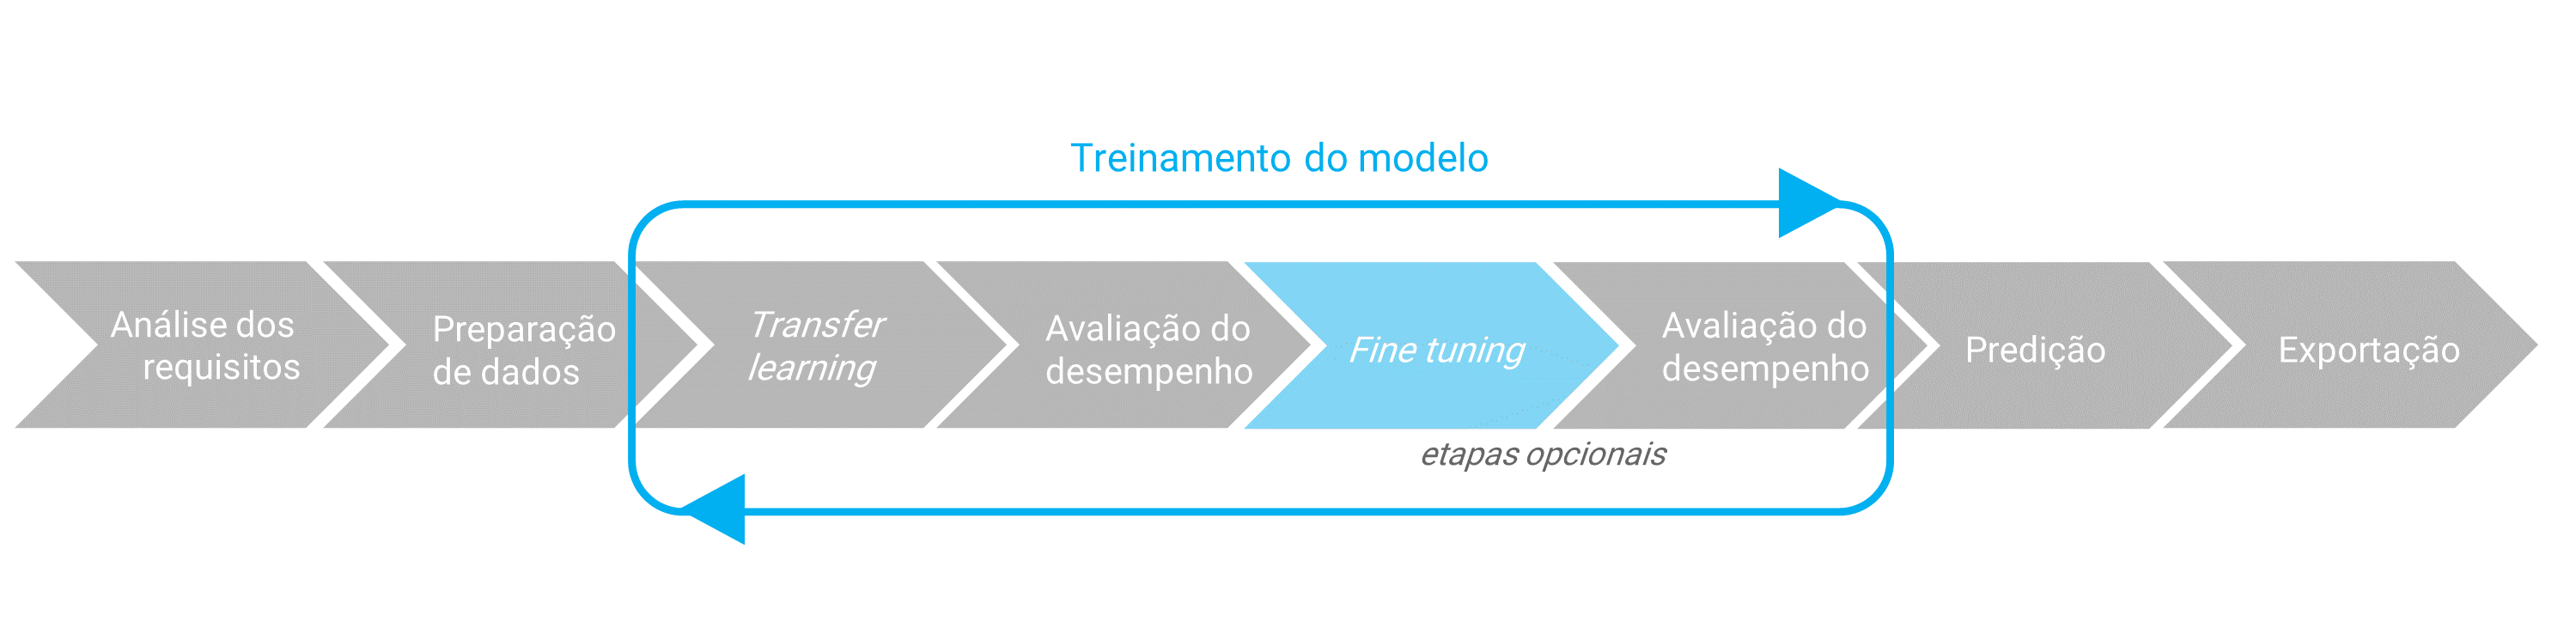

Unfreeze a rede neural

In [ ]:
learn.unfreeze()

Identificando a melhor taxa de aprendizagem
usando valley seguindo https://docs.fast.ai/callback.schedule.html
(recentemente começaram sugerir de usar o valley e não mais o steep ou minimum como ponto para a melhor taxa de aprendizagem) (Explicação do Zachary Mueller aqui: https://forums.fast.ai/t/new-lr-finder-output/89236/2)


Converter o resultado da taxa de aprendizagem sugerida (SuggestedLR) usando valley (que é um tensor) em float

In [ ]:
#Fine tuning usando lr identificado antes

learn.fine_tune(20,lr)

In [ ]:
#Terminar o run no wandb.ai

wandb.finish()

## **VALIDAÇÃO DO MODELO RESNET18**

In [163]:
from fastai.vision import *

In [164]:
learn = learn.load('FastAI_timm_COM_TESTE_RESNET18_LEARNING_RATE_001_EPOCHS_50')

In [165]:
#caminho para o diretório de teste
path_test = "test-set"

In [166]:
from fastai.vision.all import *
from fastai.vision.data import ImageBlock, CategoryBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, parent_label, RandomSplitter
from PIL import Image

#DataBlock para as imagens de teste
test_datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                           get_items=get_image_files,
                           splitter=RandomSplitter(valid_pct=0, seed=42), # Todas as imagens para 'train' e nenhuma para 'valid' Aqui é teste so
                           get_y=parent_label,
                           item_tfms=Resize(460),
                           batch_tfms=aug_transforms(size=224))

#DataLoader para as imagens de teste
test_dls = test_datablock.dataloaders(path_test, bs=16) # bs é o tamanho do lote

# Faz as previsões
preds, targs = learn.get_preds(dl=test_dls.train) # preds são as previsões; targs são as etiquetas reais (se houver)

# Decodificar as previsões para obter as classes previstas
decoded_preds = [test_dls.vocab[i] for i in preds.argmax(dim=-1)]

#print(decoded_preds) #vetor das classes previstas

In [167]:
from sklearn.metrics import accuracy_score, classification_report

# Converte as etiquetas verdadeiras para suas formas decodificadas (nomes das classes)
decoded_targs = [test_dls.vocab[i] for i in targs]

# Calcular a acurácia
acc = accuracy_score(decoded_targs, decoded_preds)
print(f"Acurácia: {acc * 100:.2f}%")

# Calcular outras métricas (precisão, recall, F1-score)
report = classification_report(decoded_targs, decoded_preds)
print("Relatório de Classificação:")
print(report)

Acurácia: 88.67%
Relatório de Classificação:
                precision    recall  f1-score   support

       acharia       0.94      0.97      0.95        30
     arctiidae       0.76      0.87      0.81        30
     automeris       0.90      0.93      0.92        30
       hylesia       0.85      0.93      0.89        30
       lonomia       0.91      0.70      0.79        30
    megalopyge       0.77      0.80      0.79        30
   nao-lagarta       1.00      0.97      0.98        30
nao-peconhenta       1.00      0.83      0.91        30
     phobetron       0.88      0.93      0.90        30
       podalia       0.90      0.93      0.92        30

      accuracy                           0.89       300
     macro avg       0.89      0.89      0.89       300
  weighted avg       0.89      0.89      0.89       300



In [33]:
!pip install tabulate

In [168]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate

# Calcular a acurácia geral
acc = accuracy_score(decoded_targs, decoded_preds)
print(f"Acurácia: {acc * 100:.2f}%")

# Calcular o relatório de classificação
report = classification_report(decoded_targs, decoded_preds)
print("Relatório de Classificação:")
print(report)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(decoded_targs, decoded_preds)
print("Matriz de Confusão:")
print(conf_matrix)

# Calcular a acurácia por classe
accuracy_per_class = {}
for i, label in enumerate(test_dls.vocab):
    accuracy_per_class[label] = conf_matrix[i][i] / sum(conf_matrix[i])

# Organizar os resultados em uma lista de tuplas (label, accuracy)
results = [(label, accuracy) for label, accuracy in accuracy_per_class.items()]

# Imprimir a tabela
print("Acurácia por Classe:")
print(tabulate(results, headers=["Classe", "Acurácia"]))

Acurácia: 88.67%
Relatório de Classificação:
                precision    recall  f1-score   support

       acharia       0.94      0.97      0.95        30
     arctiidae       0.76      0.87      0.81        30
     automeris       0.90      0.93      0.92        30
       hylesia       0.85      0.93      0.89        30
       lonomia       0.91      0.70      0.79        30
    megalopyge       0.77      0.80      0.79        30
   nao-lagarta       1.00      0.97      0.98        30
nao-peconhenta       1.00      0.83      0.91        30
     phobetron       0.88      0.93      0.90        30
       podalia       0.90      0.93      0.92        30

      accuracy                           0.89       300
     macro avg       0.89      0.89      0.89       300
  weighted avg       0.89      0.89      0.89       300

Matriz de Confusão:
[[29  0  0  0  0  1  0  0  0  0]
 [ 0 26  0  1  1  1  0  0  0  1]
 [ 0  0 28  1  0  1  0  0  0  0]
 [ 0  1  0 28  1  0  0  0  0  0]
 [ 1  3  2  2 21

In [36]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 2.4 MB/s eta 0:00:002.1 MB/s eta 0:00:01


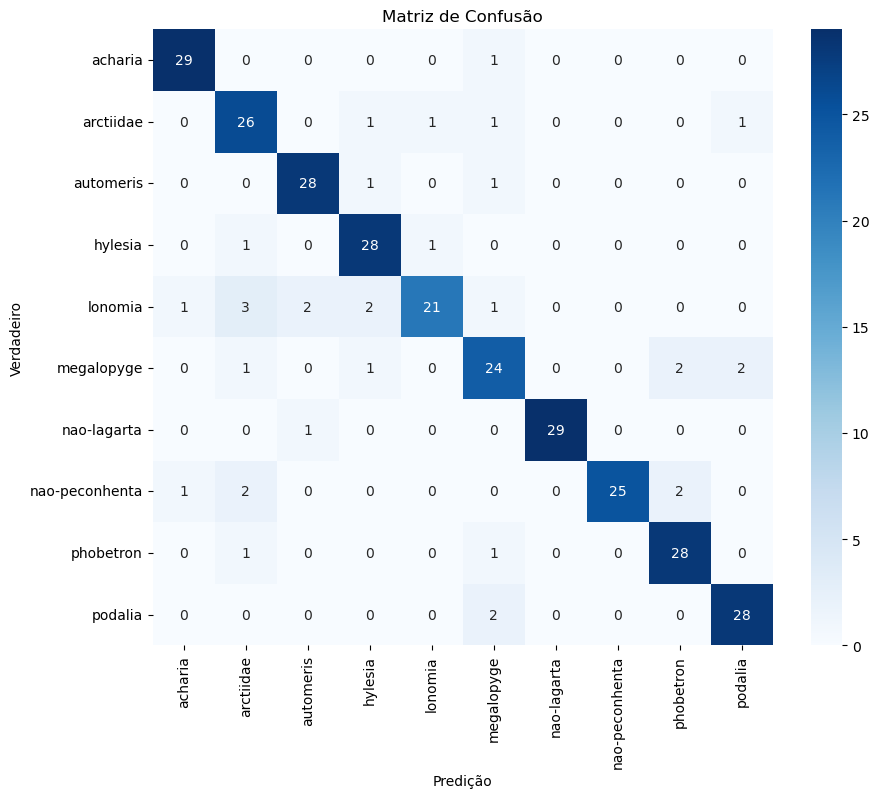

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(decoded_targs, decoded_preds)

# Transformar em um DataFrame para facilitar a visualização
class_names = test_dls.vocab
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.show()

# **TRANSFER LEARNING - TREINAMENTO (RESNET34)**
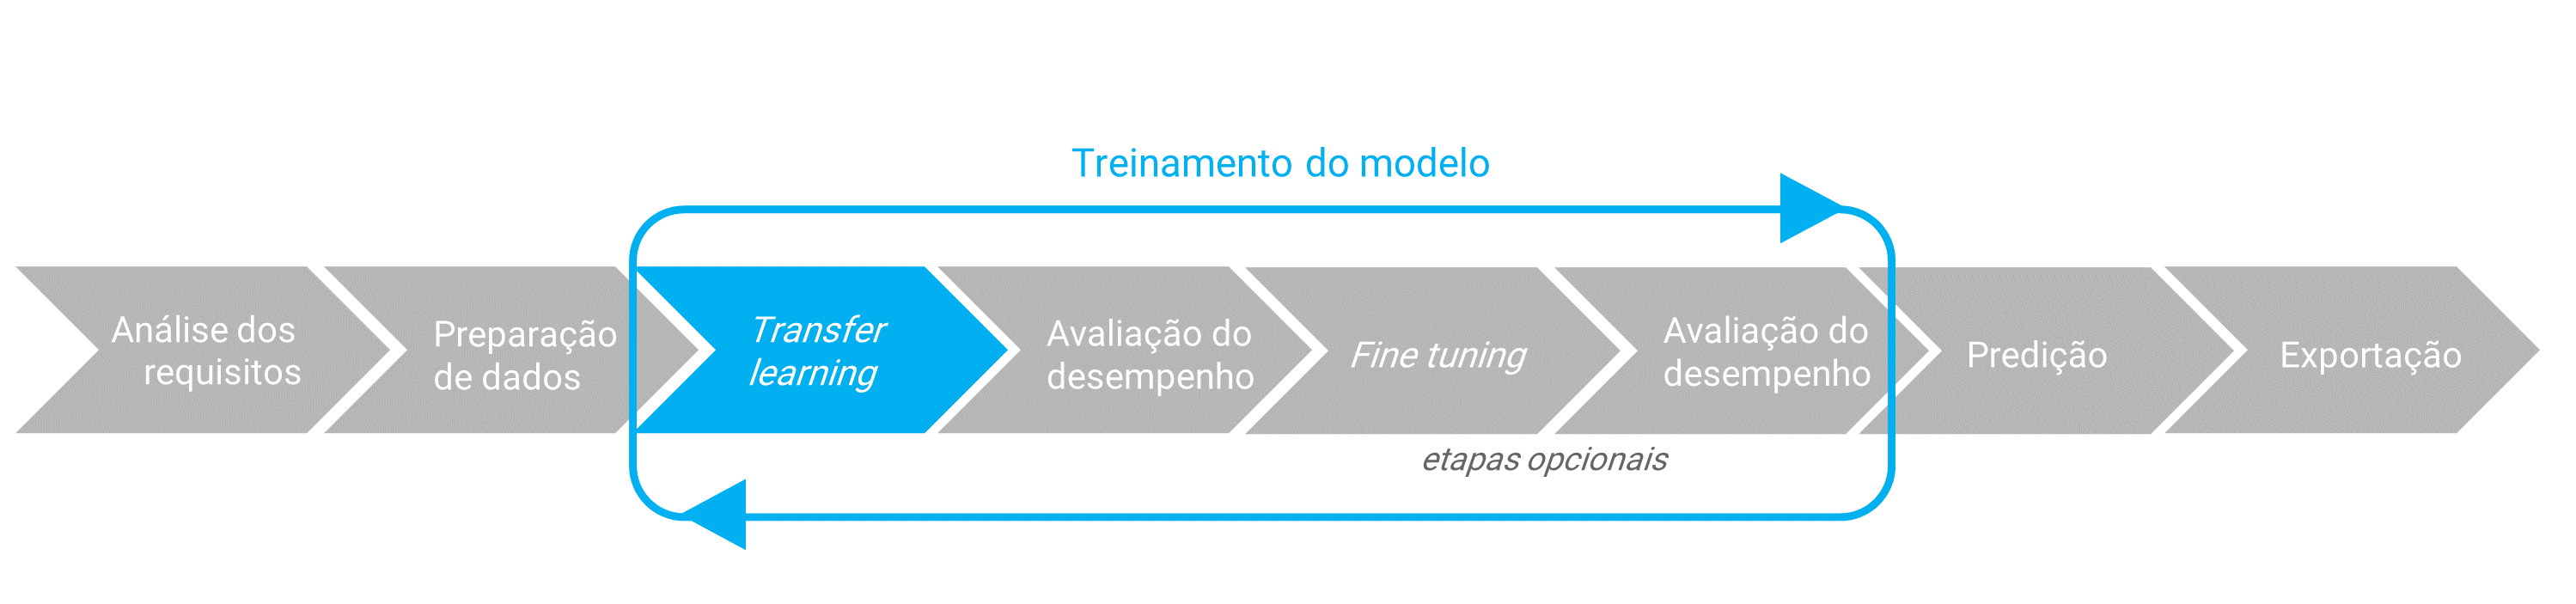

**Setup da biblioteca TIMM**

A biblioteca TIMM fornece acesso a mais do que 200 modelos pretreinados

https://timm.fast.ai/

Infos sobre as implementações dos modelos: https://rwightman.github.io/pytorch-image-models/models/

In [ ]:
!pip install timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 17.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylin

In [3]:
import timm

In [ ]:
timm.__version__

'0.9.16'

## **TREINANDO O RESNET34**

In [1]:
from fastai.vision.all import *

In [4]:
#Criar o modelo a partir da biblioteca TIMM https://timm.fast.ai/create_model

model_transfer = timm.create_model('resnet34', pretrained=True,num_classes=10)

In [ ]:
cbs=[ShowGraphCallback,ActivationStats(with_hist=True),SaveModelCallback]

In [9]:
#Criar o Learner no fastai
#cbs=[ShowGraphCallback,ActivationStats(with_hist=True),SaveModelCallback('monitor='accuracy',fname='/content/gdrive/Shareddrives/CnE_Mosquitos/JupyterNotebooks/ProjetoMLMosquito/Export/bestResnet18Model')]

#Wandb.ai callback: https://docs.fast.ai/callback.wandb.html

learn = Learner(dls, model_transfer,metrics=accuracy,cbs=ShowGraphCallback())

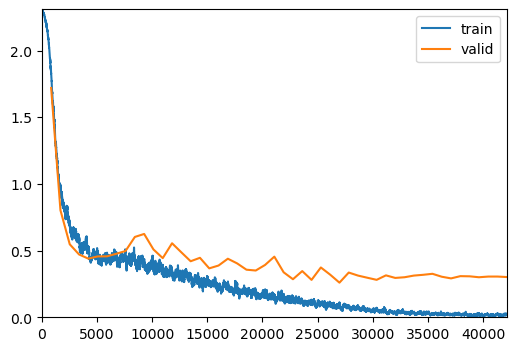

In [83]:
#Treinar o modelo com fit_one_cycle
#1
learn.fit_one_cycle(50, 1e-3)

In [84]:
learn.save('FastAI_timm_COM_TESTE_RESNET34_LEARNING_RATE_001_EPOCHS_50')

Path('models/FastAI_timm_COM_TESTE_RESNET34_LEARNING_RATE_001_EPOCHS_50.pth')

In [152]:
learn = learn.load('FastAI_timm_COM_TESTE_RESNET34_LEARNING_RATE_001_EPOCHS_50')

## **AVALIAÇÃO DO MODELO CRIADO RESNET 34**


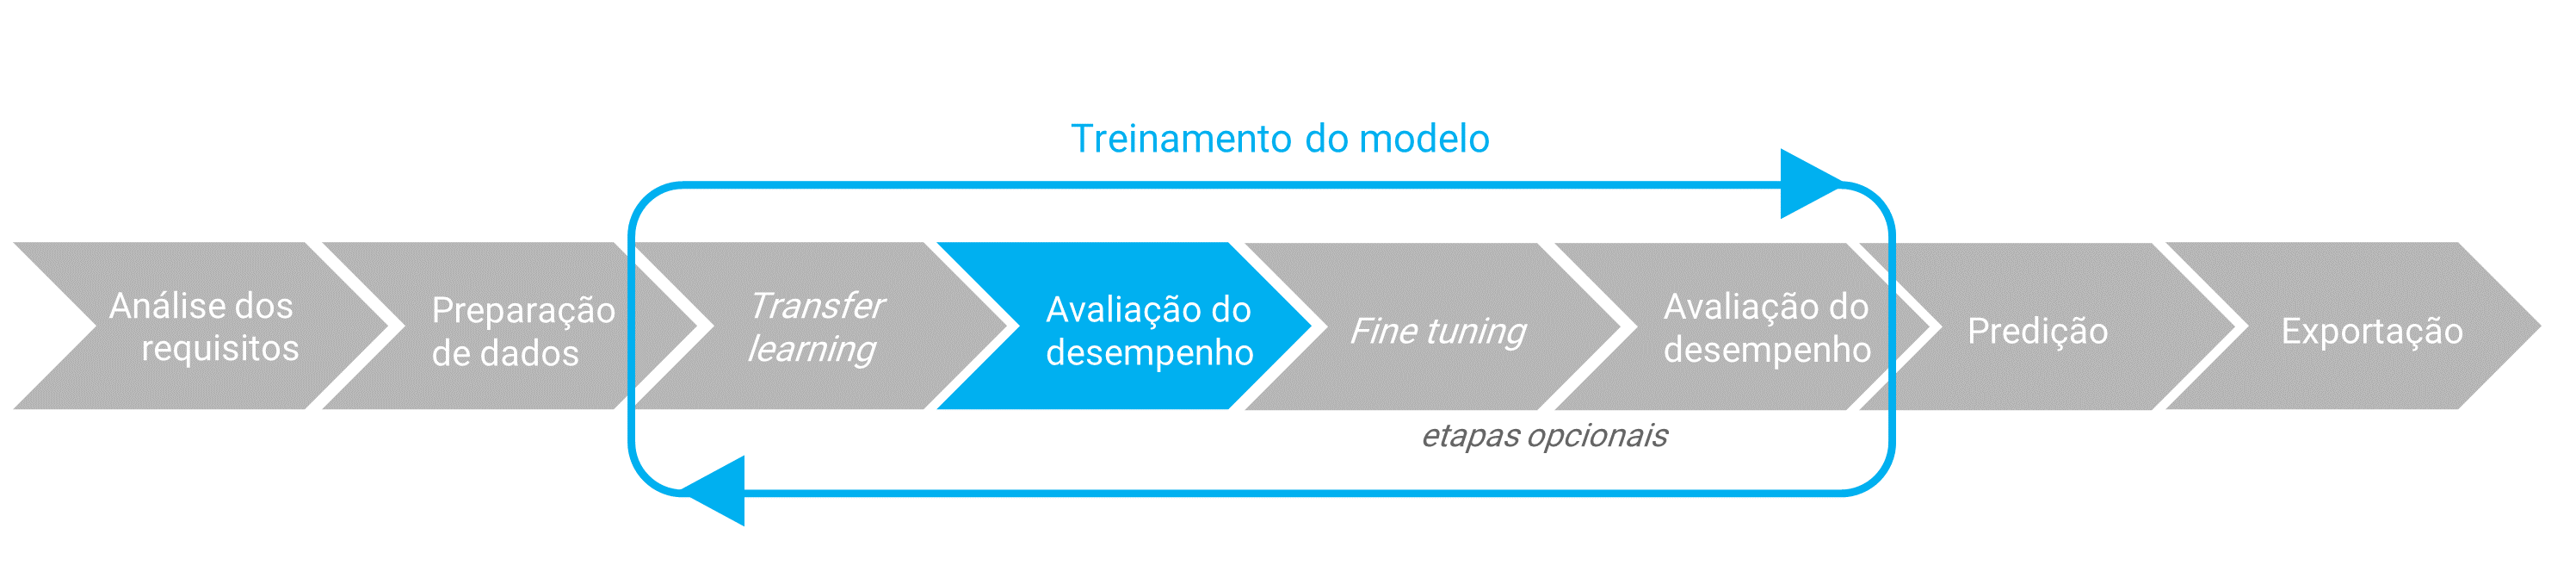

In [ ]:
# Display a project workspace
%wandb

**Avaliação da acurácia, precisão, recall e F1 score**

Accuracy tells you how many times the ML model was correct overall. Precision is how good the model is at predicting a specific category. Recall tells you how many times the model was able to detect a specific category.

Mais infos: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://www.mage.ai/blog/definitive-guide-to-accuracy-precision-recall-for-product-developers

https://regenerativetoday.com/learn-precision-recall-and-f1-score-of-multiclass-classification-in-depth/


In [15]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()

                precision    recall  f1-score   support

       acharia       0.94      0.99      0.96       148
     arctiidae       0.96      0.92      0.94       170
     automeris       0.97      0.92      0.95       140
       hylesia       0.95      0.94      0.94       176
       lonomia       0.98      1.00      0.99       149
    megalopyge       0.93      0.89      0.91       134
   nao-lagarta       0.97      0.97      0.97       134
nao-peconhenta       0.91      0.93      0.92       125
     phobetron       0.99      0.99      0.99       152
       podalia       0.91      0.95      0.93       172

      accuracy                           0.95      1500
     macro avg       0.95      0.95      0.95      1500
  weighted avg       0.95      0.95      0.95      1500



INFO: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

Matriz de confusão

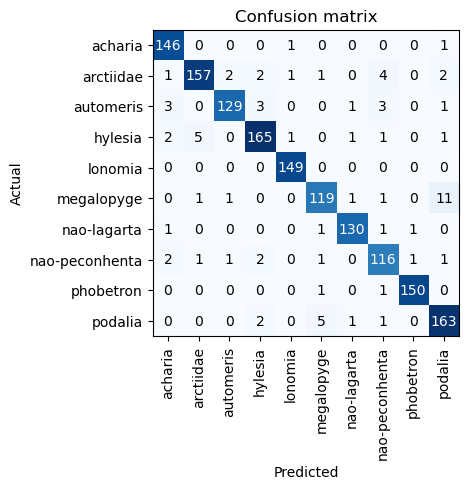

In [16]:
interp.plot_confusion_matrix()

https://search.r-project.org/CRAN/refmans/fastai/html/most_confused.html


In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

**Limpeza de dados**

IMPORTANTE: As imagens deletadas aqui serão deletadas permanentemente na origem do conjunto de dados no Google Drive!

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

## **FINE-TUNING DO MODELO CRIADO RESNET 34**
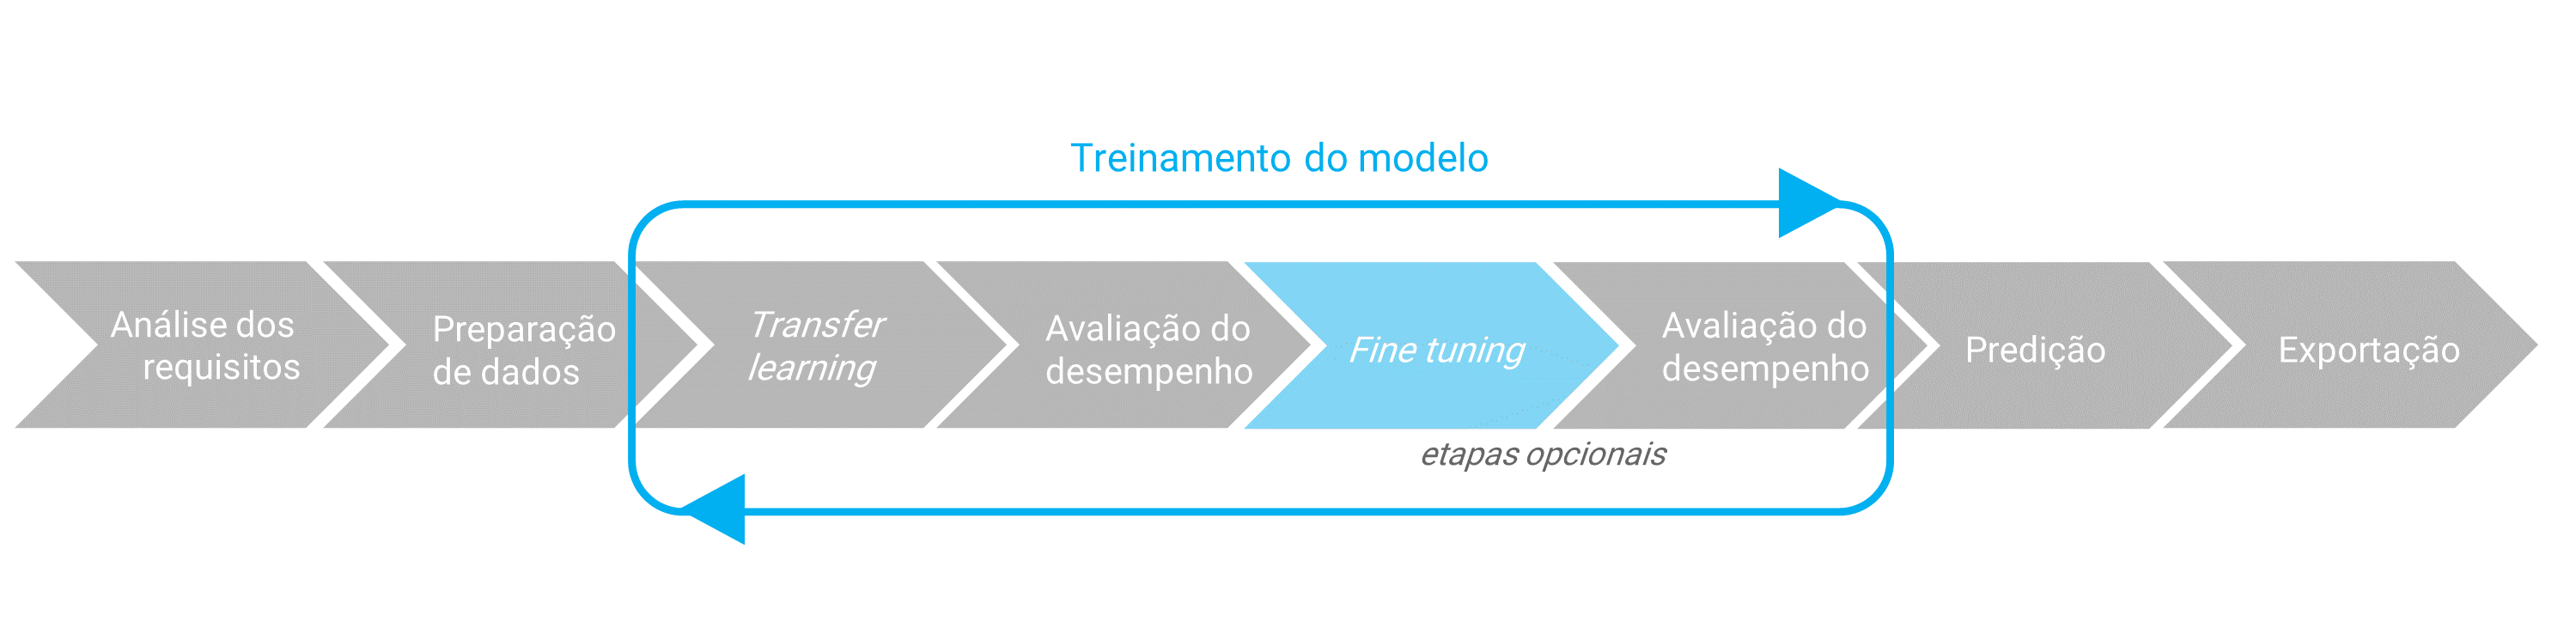

Unfreeze a rede neural

In [ ]:
learn.unfreeze()

Identificando a melhor taxa de aprendizagem
usando valley seguindo https://docs.fast.ai/callback.schedule.html
(recentemente começaram sugerir de usar o valley e não mais o steep ou minimum como ponto para a melhor taxa de aprendizagem) (Explicação do Zachary Mueller aqui: https://forums.fast.ai/t/new-lr-finder-output/89236/2)


Converter o resultado da taxa de aprendizagem sugerida (SuggestedLR) usando valley (que é um tensor) em float

In [ ]:
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
print("lr_min = ",lr_min)
print("lr_steep = ",lr_steep)
print("lr_valley = ",lr_valley)
print("lr_slide = ",lr_slide)

#Choosing a lr between the valley and the slide is a really goodv

In [ ]:
#Terminar o run no wandb.ai

wandb.finish()

## **VALIDAÇÃO DO MODELO RESNET34**

In [209]:
from fastai.vision import *

In [10]:
learn = learn.load('FastAI_timm_COM_TESTE_RESNET34_LEARNING_RATE_001_EPOCHS_50')

In [11]:
#caminho para o diretório de teste
path_test = "test-set"

In [12]:
from fastai.vision.all import *
from fastai.vision.data import ImageBlock, CategoryBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, parent_label, RandomSplitter
from PIL import Image

#DataBlock para as imagens de teste
test_datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                           get_items=get_image_files,
                           splitter=RandomSplitter(valid_pct=0, seed=42), # Todas as imagens para 'train' e nenhuma para 'valid' Aqui é teste so
                           get_y=parent_label,
                           item_tfms=Resize(460),
                           batch_tfms=aug_transforms(size=224))

#DataLoader para as imagens de teste
test_dls = test_datablock.dataloaders(path_test, bs=16) # bs é o tamanho do lote

# Faz as previsões
preds, targs = learn.get_preds(dl=test_dls.train) # preds são as previsões; targs são as etiquetas reais (se houver)

# Decodificar as previsões para obter as classes previstas
decoded_preds = [test_dls.vocab[i] for i in preds.argmax(dim=-1)]

#print(decoded_preds) #vetor das classes previstas

In [13]:
from sklearn.metrics import accuracy_score, classification_report

# Converte as etiquetas verdadeiras para suas formas decodificadas (nomes das classes)
decoded_targs = [test_dls.vocab[i] for i in targs]

# Calcular a acurácia
acc = accuracy_score(decoded_targs, decoded_preds)
print(f"Acurácia: {acc * 100:.2f}%")

# Calcular outras métricas (precisão, recall, F1-score)
report = classification_report(decoded_targs, decoded_preds)
print("Relatório de Classificação:")
print(report)

Acurácia: 87.67%
Relatório de Classificação:
                precision    recall  f1-score   support

       acharia       1.00      0.97      0.98        30
     arctiidae       0.77      0.90      0.83        30
     automeris       0.81      0.97      0.88        30
       hylesia       0.84      0.87      0.85        30
       lonomia       0.91      0.67      0.77        30
    megalopyge       0.76      0.87      0.81        30
   nao-lagarta       1.00      0.90      0.95        30
nao-peconhenta       1.00      0.87      0.93        30
     phobetron       0.93      0.93      0.93        30
       podalia       0.83      0.83      0.83        30

      accuracy                           0.88       300
     macro avg       0.89      0.88      0.88       300
  weighted avg       0.89      0.88      0.88       300



In [14]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate

# Calcular a acurácia geral
acc = accuracy_score(decoded_targs, decoded_preds)
print(f"Acurácia: {acc * 100:.2f}%")

# Calcular o relatório de classificação
report = classification_report(decoded_targs, decoded_preds)
print("Relatório de Classificação:")
print(report)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(decoded_targs, decoded_preds)
print("Matriz de Confusão:")
print(conf_matrix)

# Calcular a acurácia por classe
accuracy_per_class = {}
for i, label in enumerate(test_dls.vocab):
    accuracy_per_class[label] = conf_matrix[i][i] / sum(conf_matrix[i])

# Organizar os resultados em uma lista de tuplas (label, accuracy)
results = [(label, accuracy) for label, accuracy in accuracy_per_class.items()]

# Imprimir a tabela
print("Acurácia por Classe:")
print(tabulate(results, headers=["Classe", "Acurácia"]))

Acurácia: 87.67%
Relatório de Classificação:
                precision    recall  f1-score   support

       acharia       1.00      0.97      0.98        30
     arctiidae       0.77      0.90      0.83        30
     automeris       0.81      0.97      0.88        30
       hylesia       0.84      0.87      0.85        30
       lonomia       0.91      0.67      0.77        30
    megalopyge       0.76      0.87      0.81        30
   nao-lagarta       1.00      0.90      0.95        30
nao-peconhenta       1.00      0.87      0.93        30
     phobetron       0.93      0.93      0.93        30
       podalia       0.83      0.83      0.83        30

      accuracy                           0.88       300
     macro avg       0.89      0.88      0.88       300
  weighted avg       0.89      0.88      0.88       300

Matriz de Confusão:
[[29  0  1  0  0  0  0  0  0  0]
 [ 0 27  0  1  0  1  0  0  0  1]
 [ 0  0 29  0  0  1  0  0  0  0]
 [ 0  2  0 26  2  0  0  0  0  0]
 [ 0  2  4  3 20

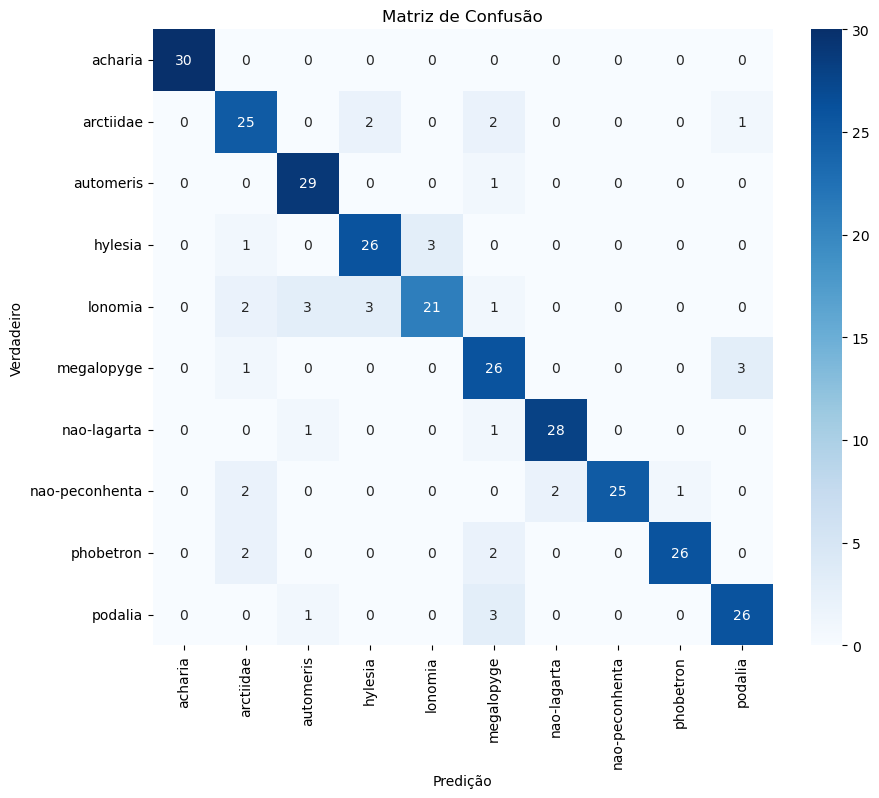

In [159]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(decoded_targs, decoded_preds)

# Transformar em um DataFrame para facilitar a visualização
class_names = test_dls.vocab
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.show()

# **TRANSFER LEARNING - TREINAMENTO (EfficientNetLite)**
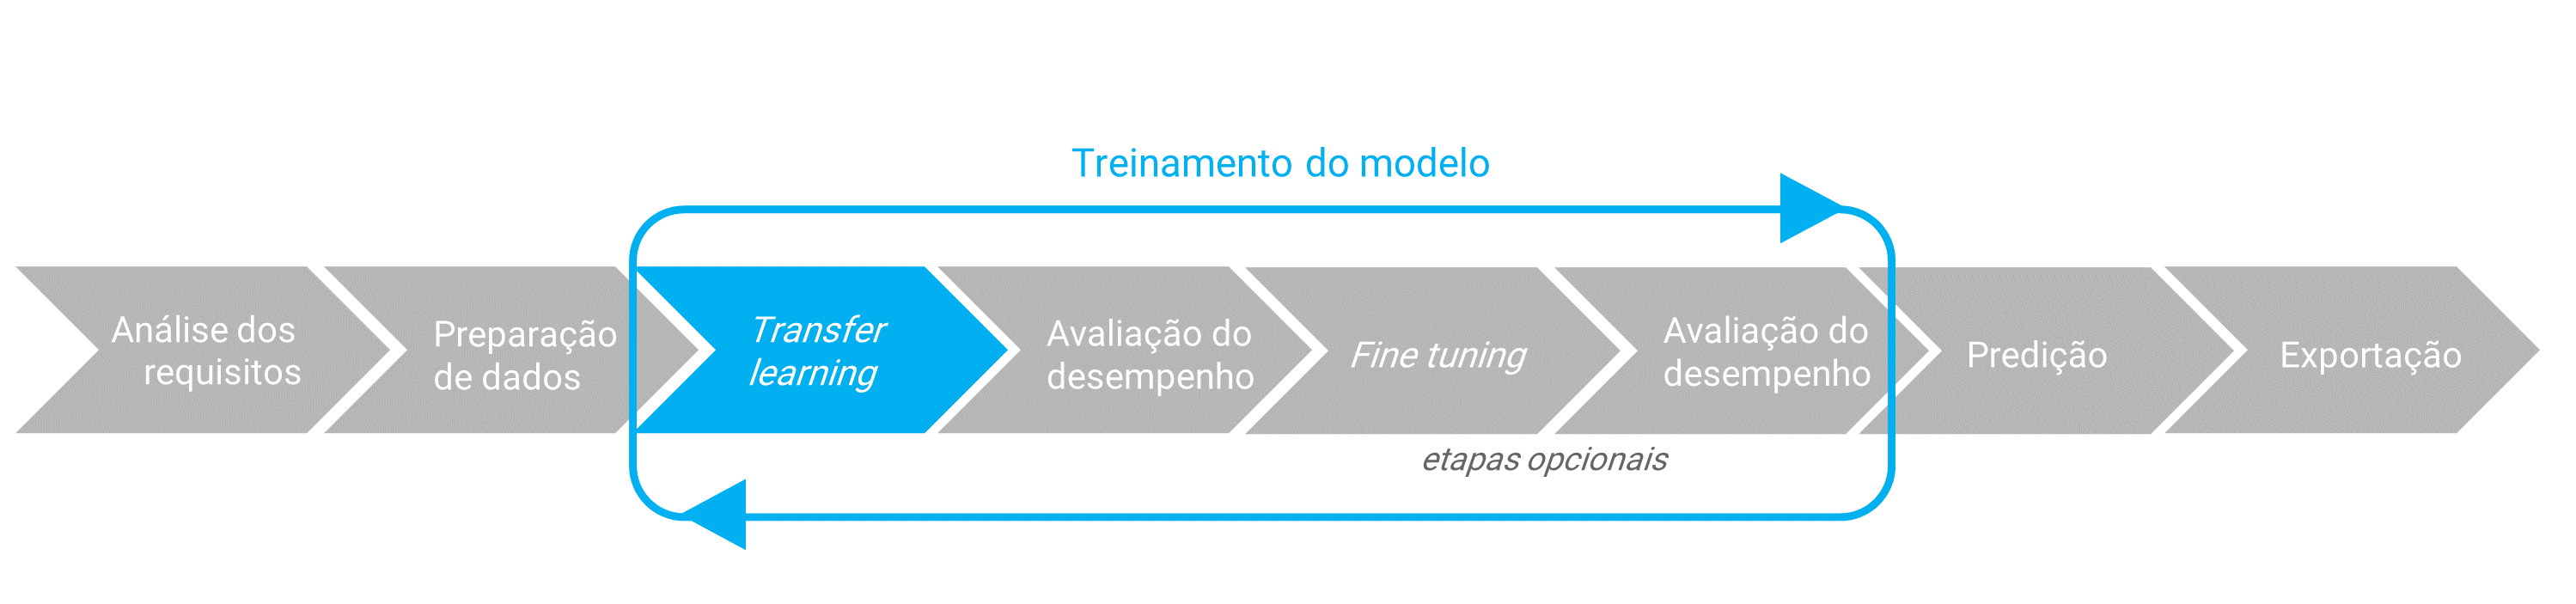

**Setup da biblioteca TIMM**

A biblioteca TIMM fornece acesso a mais do que 200 modelos pretreinados

https://timm.fast.ai/

Infos sobre as implementações dos modelos: https://rwightman.github.io/pytorch-image-models/models/

In [ ]:
!pip install timm

In [7]:
import timm

In [8]:
timm.__version__

'0.9.16'

## **TREINANDO O EfficientNetLite**

In [29]:
from fastai.vision.all import *

In [140]:
#Criar o modelo a partir da biblioteca TIMM https://timm.fast.ai/create_model

model_transfer = timm.create_model('tf_efficientnet_lite0', pretrained=True,num_classes=10)

In [ ]:
cbs=[ShowGraphCallback,ActivationStats(with_hist=True),SaveModelCallback]

In [141]:
#Criar o Learner no fastai
#cbs=[ShowGraphCallback,ActivationStats(with_hist=True),SaveModelCallback('monitor='accuracy',fname='/content/gdrive/Shareddrives/CnE_Mosquitos/JupyterNotebooks/ProjetoMLMosquito/Export/bestResnet18Model')]

#Wandb.ai callback: https://docs.fast.ai/callback.wandb.html

learn = Learner(dls, model_transfer,metrics=accuracy, cbs=ShowGraphCallback())

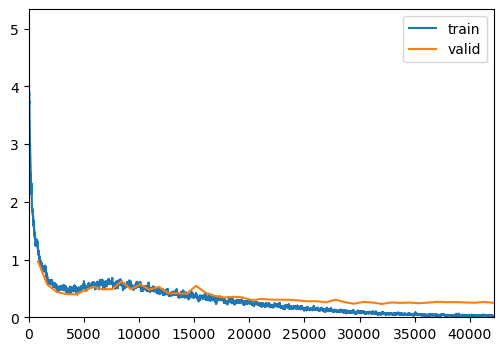

In [19]:
#Treinar o modelo com fit_one_cycle

learn.fit_one_cycle(50, 1e-3)

In [20]:
learn.save('FastAI_timm_COM_TESTE_EFFICIENTNETLITE_LEARNING_RATE_001_EPOCHS_50')

Path('models/FastAI_timm_COM_TESTE_EFFICIENTNETLITE_LEARNING_RATE_001_EPOCHS_50.pth')

In [142]:
learn = learn.load('FastAI_timm_COM_TESTE_EFFICIENTNETLITE_LEARNING_RATE_001_EPOCHS_50')

## **AVALIAÇÃO DO MODELO CRIADO EFFICIENTNETLITE**


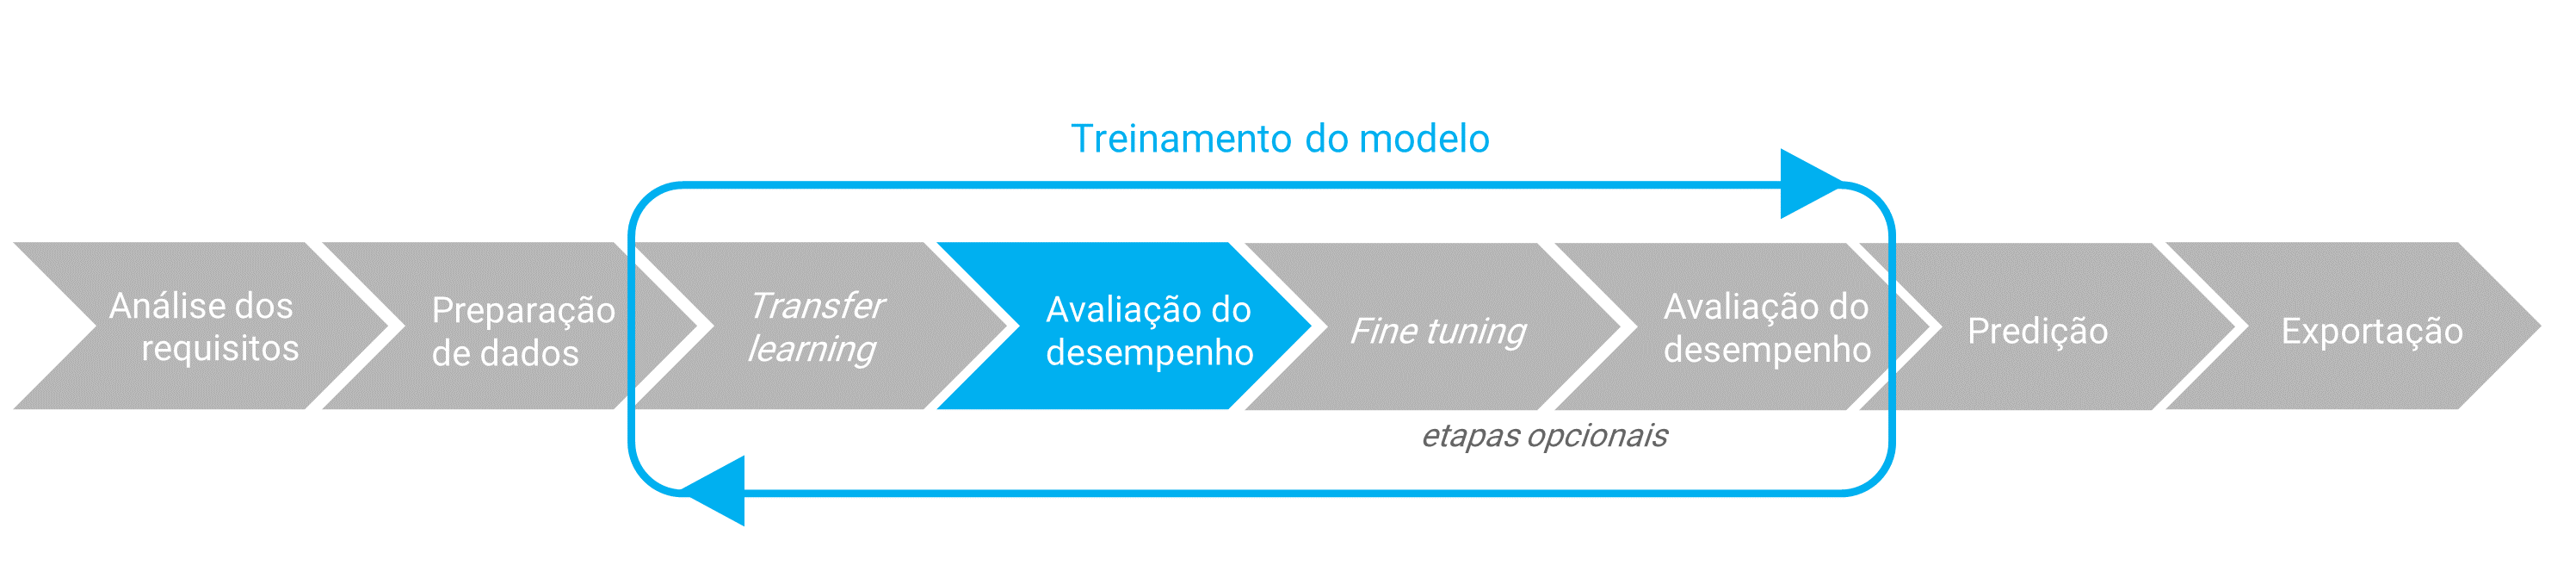

In [ ]:
# Display a project workspace
%wandb

**Avaliação da acurácia, precisão, recall e F1 score**

Accuracy tells you how many times the ML model was correct overall. Precision is how good the model is at predicting a specific category. Recall tells you how many times the model was able to detect a specific category.

Mais infos: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://www.mage.ai/blog/definitive-guide-to-accuracy-precision-recall-for-product-developers

https://regenerativetoday.com/learn-precision-recall-and-f1-score-of-multiclass-classification-in-depth/


In [106]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()

                precision    recall  f1-score   support

       acharia       0.97      0.97      0.97       148
     arctiidae       0.94      0.95      0.94       170
     automeris       0.96      0.94      0.95       140
       hylesia       0.97      0.95      0.96       176
       lonomia       0.99      1.00      1.00       149
    megalopyge       0.93      0.85      0.89       134
   nao-lagarta       0.97      0.99      0.98       134
nao-peconhenta       0.92      0.94      0.93       125
     phobetron       0.97      0.99      0.98       152
       podalia       0.90      0.92      0.91       172

      accuracy                           0.95      1500
     macro avg       0.95      0.95      0.95      1500
  weighted avg       0.95      0.95      0.95      1500



INFO: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

Matriz de confusão

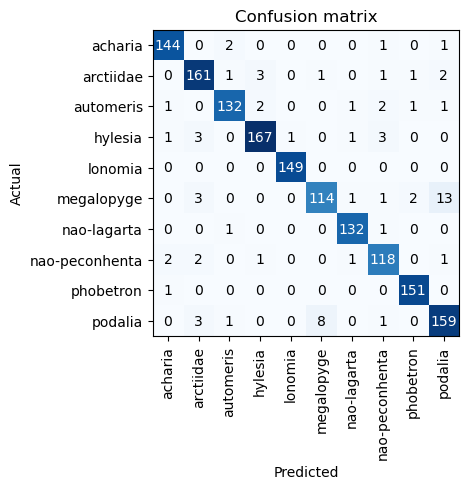

In [107]:
interp.plot_confusion_matrix()

https://search.r-project.org/CRAN/refmans/fastai/html/most_confused.html


In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

**Limpeza de dados**

IMPORTANTE: As imagens deletadas aqui serão deletadas permanentemente na origem do conjunto de dados no Google Drive!

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

## **FINE-TUNING DO MODELO CRIADO EFFICIENTNETLITE**
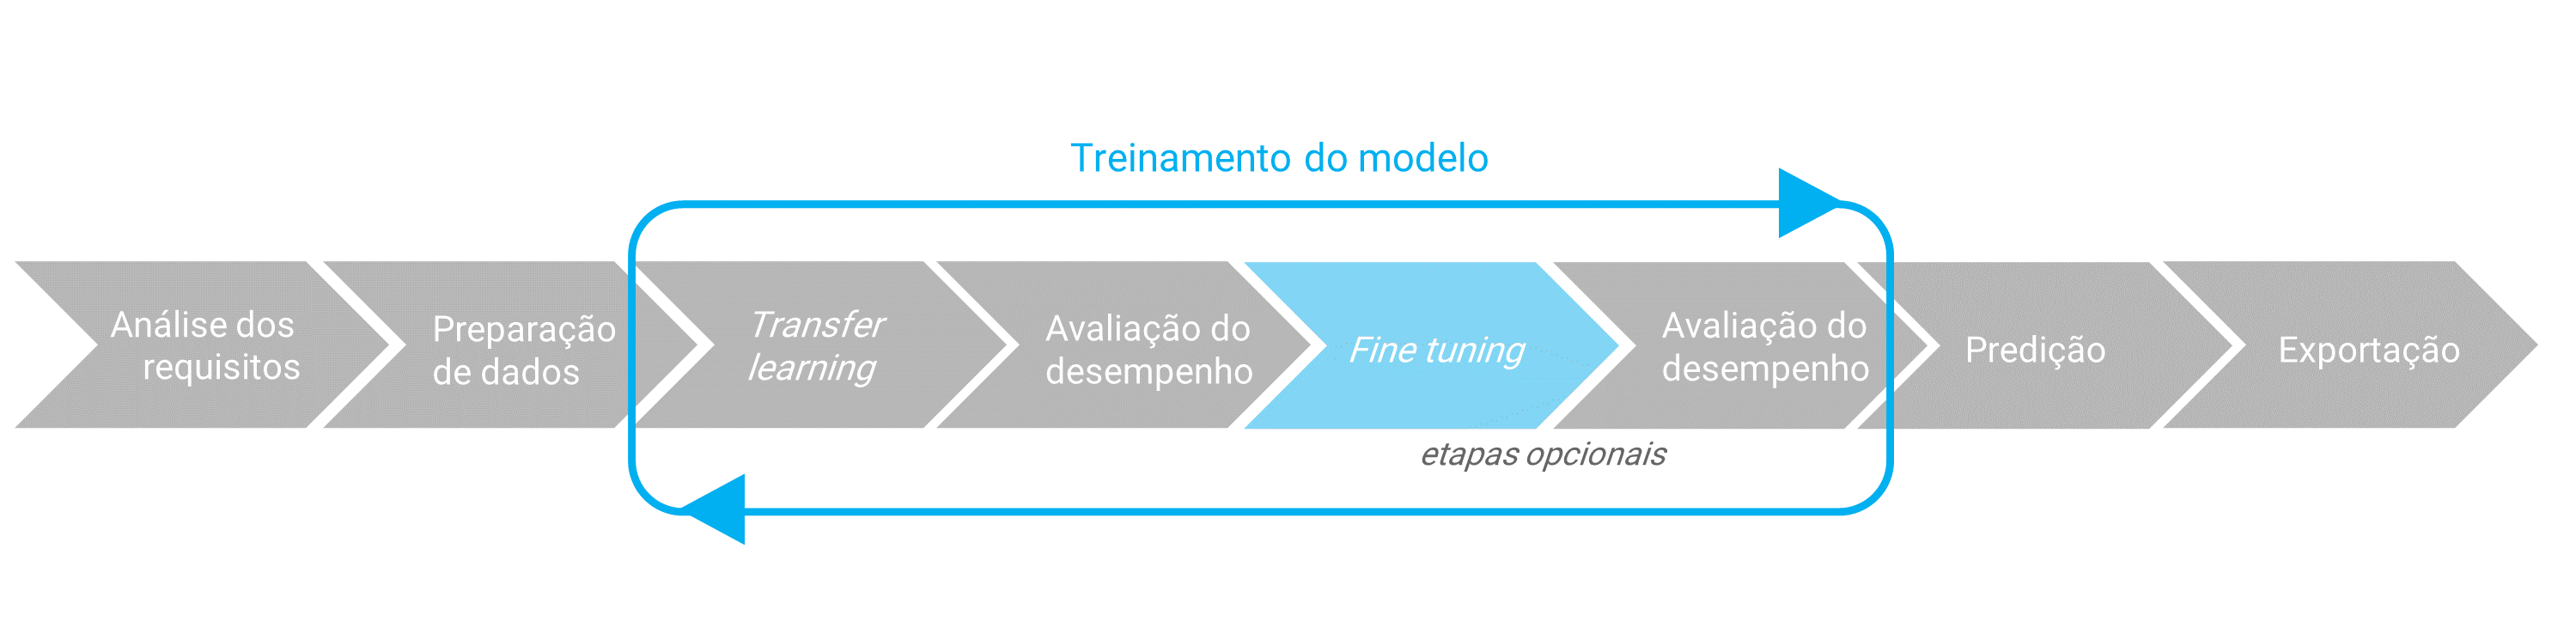

Unfreeze a rede neural

In [ ]:
learn.unfreeze()

Identificando a melhor taxa de aprendizagem
usando valley seguindo https://docs.fast.ai/callback.schedule.html
(recentemente começaram sugerir de usar o valley e não mais o steep ou minimum como ponto para a melhor taxa de aprendizagem) (Explicação do Zachary Mueller aqui: https://forums.fast.ai/t/new-lr-finder-output/89236/2)


Converter o resultado da taxa de aprendizagem sugerida (SuggestedLR) usando valley (que é um tensor) em float

In [ ]:
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
print("lr_min = ",lr_min)
print("lr_steep = ",lr_steep)
print("lr_valley = ",lr_valley)
print("lr_slide = ",lr_slide)

#Choosing a lr between the valley and the slide is a really goodv

In [ ]:
#Terminar o run no wandb.ai

wandb.finish()

## **VALIDAÇÃO DO MODELO EFFICIENTNETLITE**

In [143]:
from fastai.vision import *

In [144]:
learn = learn.load('FastAI_timm_COM_TESTE_EFFICIENTNETLITE_LEARNING_RATE_001_EPOCHS_50')

In [145]:
#caminho para o diretório de teste
path_test = "test-set"

In [146]:
from fastai.vision.all import *
from fastai.vision.data import ImageBlock, CategoryBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, parent_label, RandomSplitter
from PIL import Image

#DataBlock para as imagens de teste
test_datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                           get_items=get_image_files,
                           splitter=RandomSplitter(valid_pct=0, seed=42), # Todas as imagens para 'train' e nenhuma para 'valid' Aqui é teste so
                           get_y=parent_label,
                           item_tfms=Resize(460),
                           batch_tfms=aug_transforms(size=224))

#DataLoader para as imagens de teste
test_dls = test_datablock.dataloaders(path_test, bs=16) # bs é o tamanho do lote

# Faz as previsões
preds, targs = learn.get_preds(dl=test_dls.train) # preds são as previsões; targs são as etiquetas reais (se houver)

# Decodificar as previsões para obter as classes previstas
decoded_preds = [test_dls.vocab[i] for i in preds.argmax(dim=-1)]

#print(decoded_preds) #vetor das classes previstas

In [147]:
from sklearn.metrics import accuracy_score, classification_report

# Converte as etiquetas verdadeiras para suas formas decodificadas (nomes das classes)
decoded_targs = [test_dls.vocab[i] for i in targs]

# Calcular a acurácia
acc = accuracy_score(decoded_targs, decoded_preds)
print(f"Acurácia: {acc * 100:.2f}%")

# Calcular outras métricas (precisão, recall, F1-score)
report = classification_report(decoded_targs, decoded_preds)
print("Relatório de Classificação:")
print(report)

Acurácia: 88.00%
Relatório de Classificação:
                precision    recall  f1-score   support

       acharia       0.97      1.00      0.98        30
     arctiidae       0.82      0.90      0.86        30
     automeris       0.88      0.93      0.90        30
       hylesia       0.83      0.83      0.83        30
       lonomia       0.81      0.70      0.75        30
    megalopyge       0.70      0.87      0.78        30
   nao-lagarta       0.97      0.97      0.97        30
nao-peconhenta       0.96      0.83      0.89        30
     phobetron       1.00      0.97      0.98        30
       podalia       0.92      0.80      0.86        30

      accuracy                           0.88       300
     macro avg       0.89      0.88      0.88       300
  weighted avg       0.89      0.88      0.88       300



In [148]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate

# Calcular a acurácia geral
acc = accuracy_score(decoded_targs, decoded_preds)
print(f"Acurácia: {acc * 100:.2f}%")

# Calcular o relatório de classificação
report = classification_report(decoded_targs, decoded_preds)
print("Relatório de Classificação:")
print(report)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(decoded_targs, decoded_preds)
print("Matriz de Confusão:")
print(conf_matrix)

# Calcular a acurácia por classe
accuracy_per_class = {}
for i, label in enumerate(test_dls.vocab):
    accuracy_per_class[label] = conf_matrix[i][i] / sum(conf_matrix[i])

# Organizar os resultados em uma lista de tuplas (label, accuracy)
results = [(label, accuracy) for label, accuracy in accuracy_per_class.items()]

# Imprimir a tabela
print("Acurácia por Classe:")
print(tabulate(results, headers=["Classe", "Acurácia"]))

Acurácia: 88.00%
Relatório de Classificação:
                precision    recall  f1-score   support

       acharia       0.97      1.00      0.98        30
     arctiidae       0.82      0.90      0.86        30
     automeris       0.88      0.93      0.90        30
       hylesia       0.83      0.83      0.83        30
       lonomia       0.81      0.70      0.75        30
    megalopyge       0.70      0.87      0.78        30
   nao-lagarta       0.97      0.97      0.97        30
nao-peconhenta       0.96      0.83      0.89        30
     phobetron       1.00      0.97      0.98        30
       podalia       0.92      0.80      0.86        30

      accuracy                           0.88       300
     macro avg       0.89      0.88      0.88       300
  weighted avg       0.89      0.88      0.88       300

Matriz de Confusão:
[[30  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  2  0  0  1  0  0]
 [ 0  0 28  1  0  0  1  0  0  0]
 [ 0  1  0 25  2  2  0  0  0  0]
 [ 1  1  4  3 21

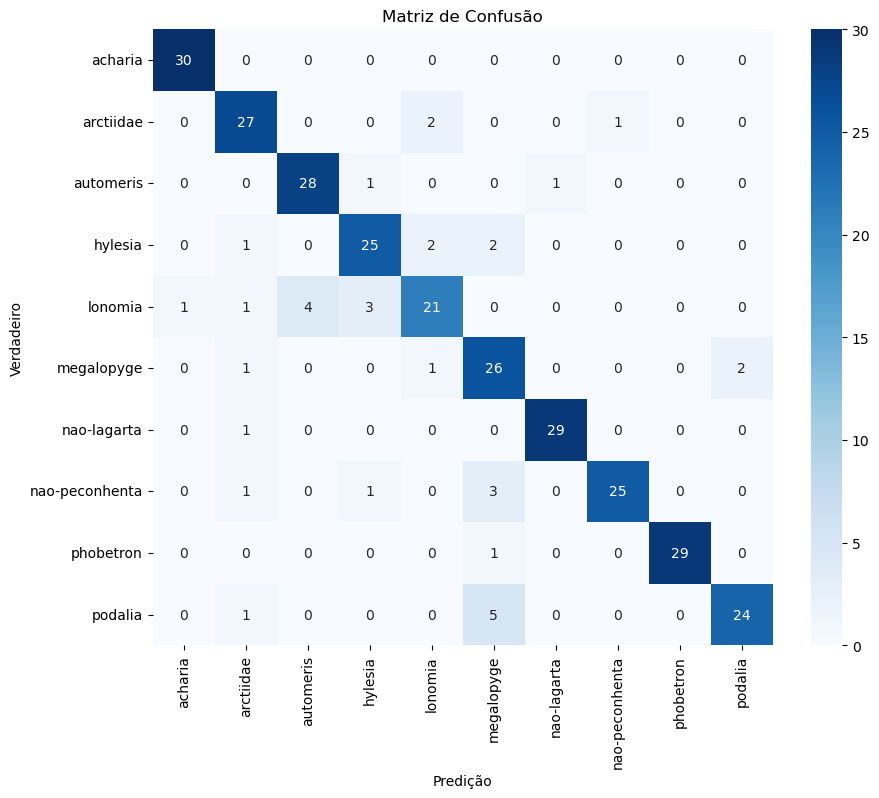

In [149]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(decoded_targs, decoded_preds)

# Transformar em um DataFrame para facilitar a visualização
class_names = test_dls.vocab
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.show()

# **TRANSFER LEARNING - TREINAMENTO (EfficientNetB0)**
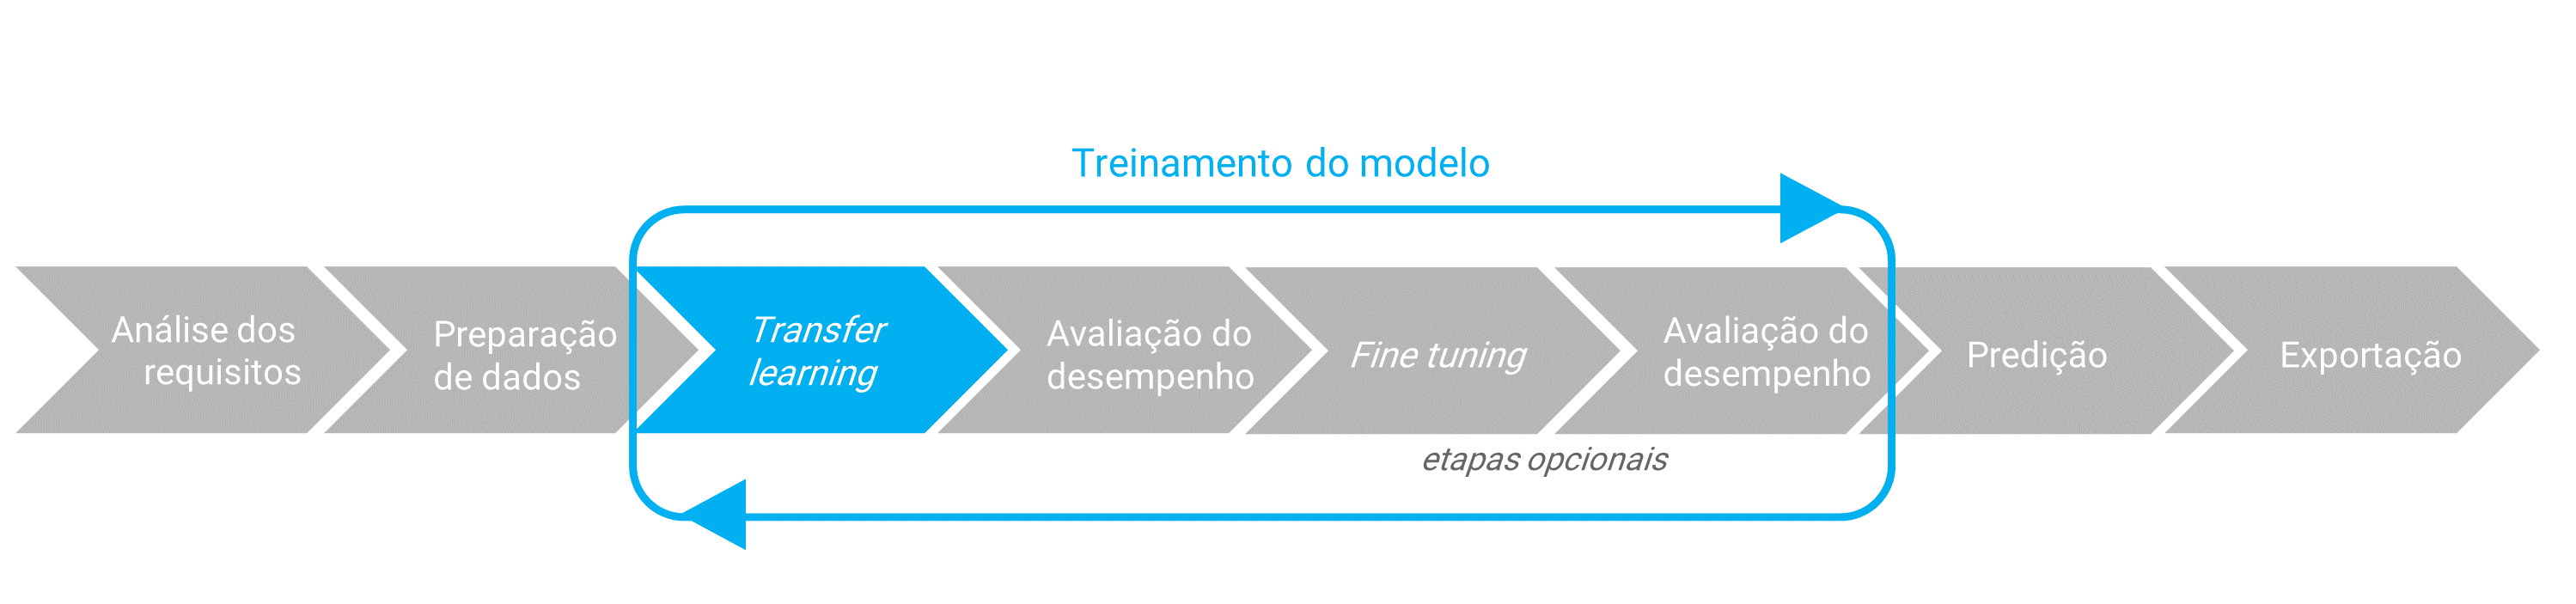

**Setup da biblioteca TIMM**

A biblioteca TIMM fornece acesso a mais do que 200 modelos pretreinados

https://timm.fast.ai/

Infos sobre as implementações dos modelos: https://rwightman.github.io/pytorch-image-models/models/

In [ ]:
!pip install timm

In [ ]:
import timm

In [ ]:
timm.__version__

## **TREINANDO O EfficientNetB0**

In [ ]:
from fastai.vision.all import *

In [125]:
#Criar o modelo a partir da biblioteca TIMM https://timm.fast.ai/create_model

model_transfer = timm.create_model('tf_efficientnetv2_b0', pretrained=True,num_classes=10)

In [ ]:
cbs=[ShowGraphCallback,ActivationStats(with_hist=True),SaveModelCallback]

In [126]:
#Criar o Learner no fastai
#cbs=[ShowGraphCallback,ActivationStats(with_hist=True),SaveModelCallback('monitor='accuracy',fname='/content/gdrive/Shareddrives/CnE_Mosquitos/JupyterNotebooks/ProjetoMLMosquito/Export/bestResnet18Model')]

#Wandb.ai callback: https://docs.fast.ai/callback.wandb.html

learn = Learner(dls, model_transfer,metrics=accuracy, cbs=ShowGraphCallback)

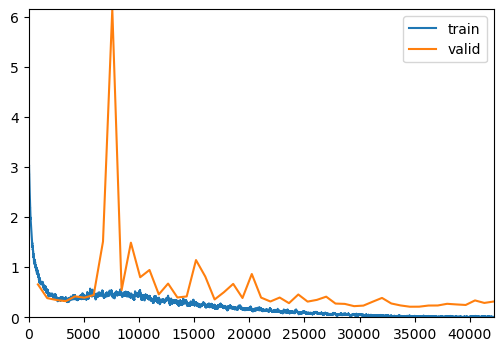

In [87]:
#Treinar o modelo com fit_one_cycle

learn.fit_one_cycle(50, 1e-3)

In [88]:
learn.save('FastAI_timm_COM_TESTE_EFFICIENTNETB0_LEARNING_RATE_001_EPOCHS_50')

Path('models/FastAI_timm_COM_TESTE_EFFICIENTNETB0_LEARNING_RATE_001_EPOCHS_50.pth')

In [127]:
learn.load('FastAI_timm_COM_TESTE_EFFICIENTNETB0_LEARNING_RATE_001_EPOCHS_50')

## **AVALIAÇÃO DO MODELO CRIADO EfficientNetB0**


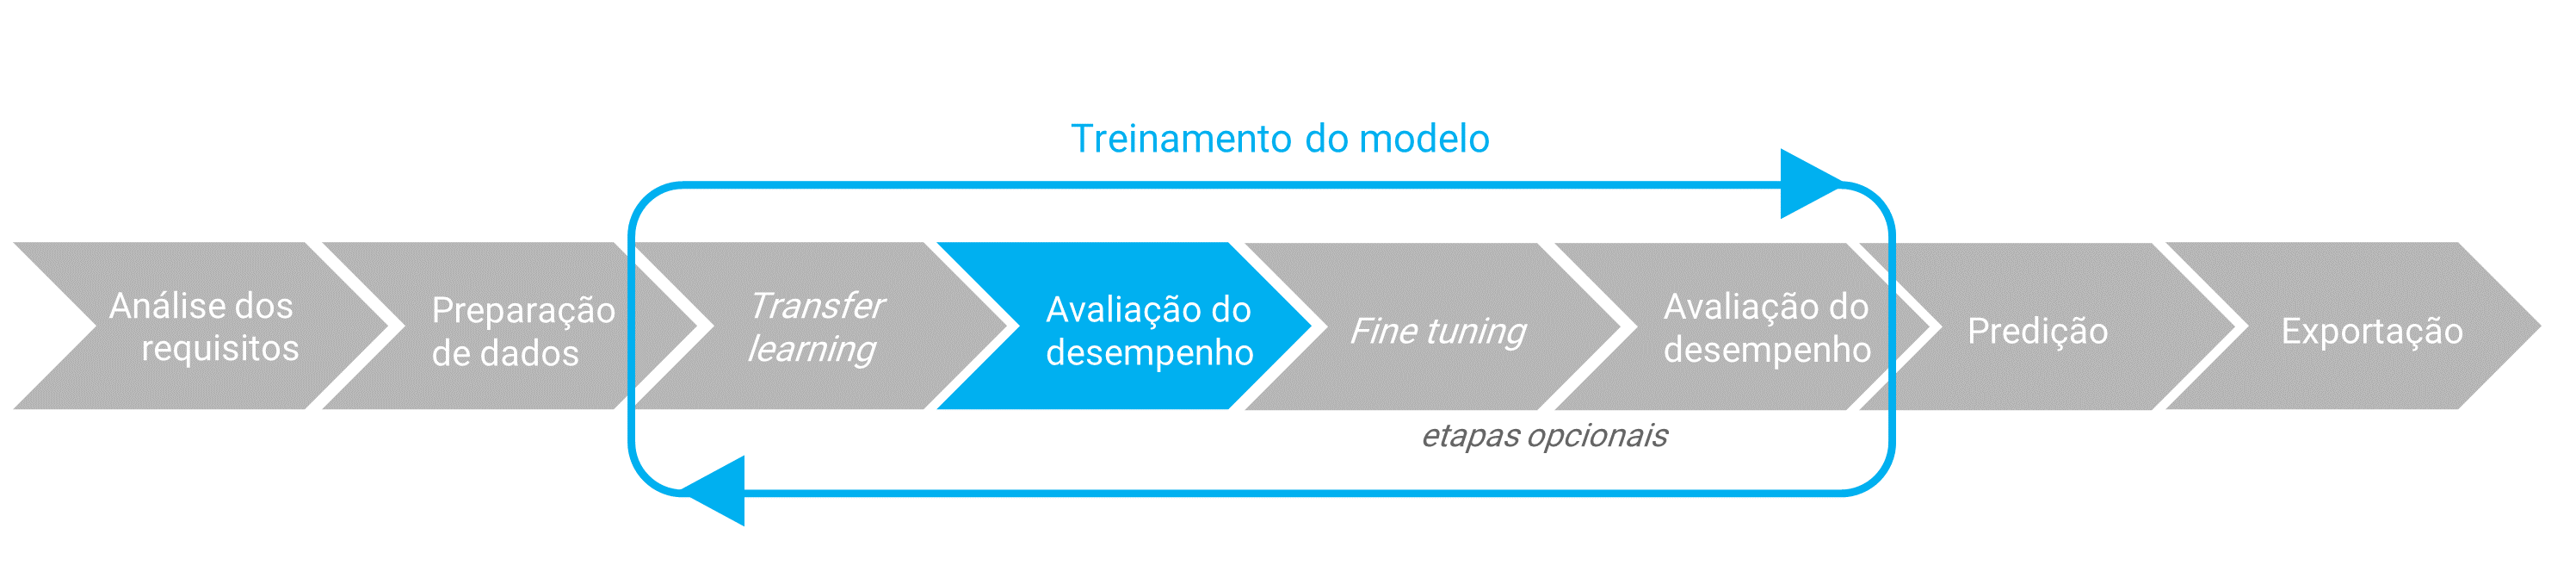

In [ ]:
# Display a project workspace
%wandb

**Avaliação da acurácia, precisão, recall e F1 score**

Accuracy tells you how many times the ML model was correct overall. Precision is how good the model is at predicting a specific category. Recall tells you how many times the model was able to detect a specific category.

Mais infos: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://www.mage.ai/blog/definitive-guide-to-accuracy-precision-recall-for-product-developers

https://regenerativetoday.com/learn-precision-recall-and-f1-score-of-multiclass-classification-in-depth/


In [111]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()

                precision    recall  f1-score   support

       acharia       0.99      0.97      0.98       148
     arctiidae       0.96      0.96      0.96       170
     automeris       0.96      0.94      0.95       140
       hylesia       0.98      0.96      0.97       176
       lonomia       0.99      1.00      0.99       149
    megalopyge       0.89      0.89      0.89       134
   nao-lagarta       0.95      0.99      0.97       134
nao-peconhenta       0.92      0.93      0.92       125
     phobetron       0.97      0.99      0.98       152
       podalia       0.94      0.94      0.94       172

      accuracy                           0.96      1500
     macro avg       0.96      0.96      0.96      1500
  weighted avg       0.96      0.96      0.96      1500



INFO: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

Matriz de confusão

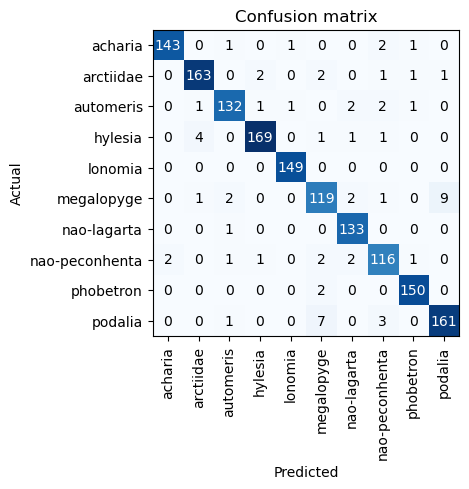

In [112]:
interp.plot_confusion_matrix()

https://search.r-project.org/CRAN/refmans/fastai/html/most_confused.html


In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

**Limpeza de dados**

IMPORTANTE: As imagens deletadas aqui serão deletadas permanentemente na origem do conjunto de dados no Google Drive!

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

## **FINE-TUNING DO MODELO CRIADO EfficientNetB0**
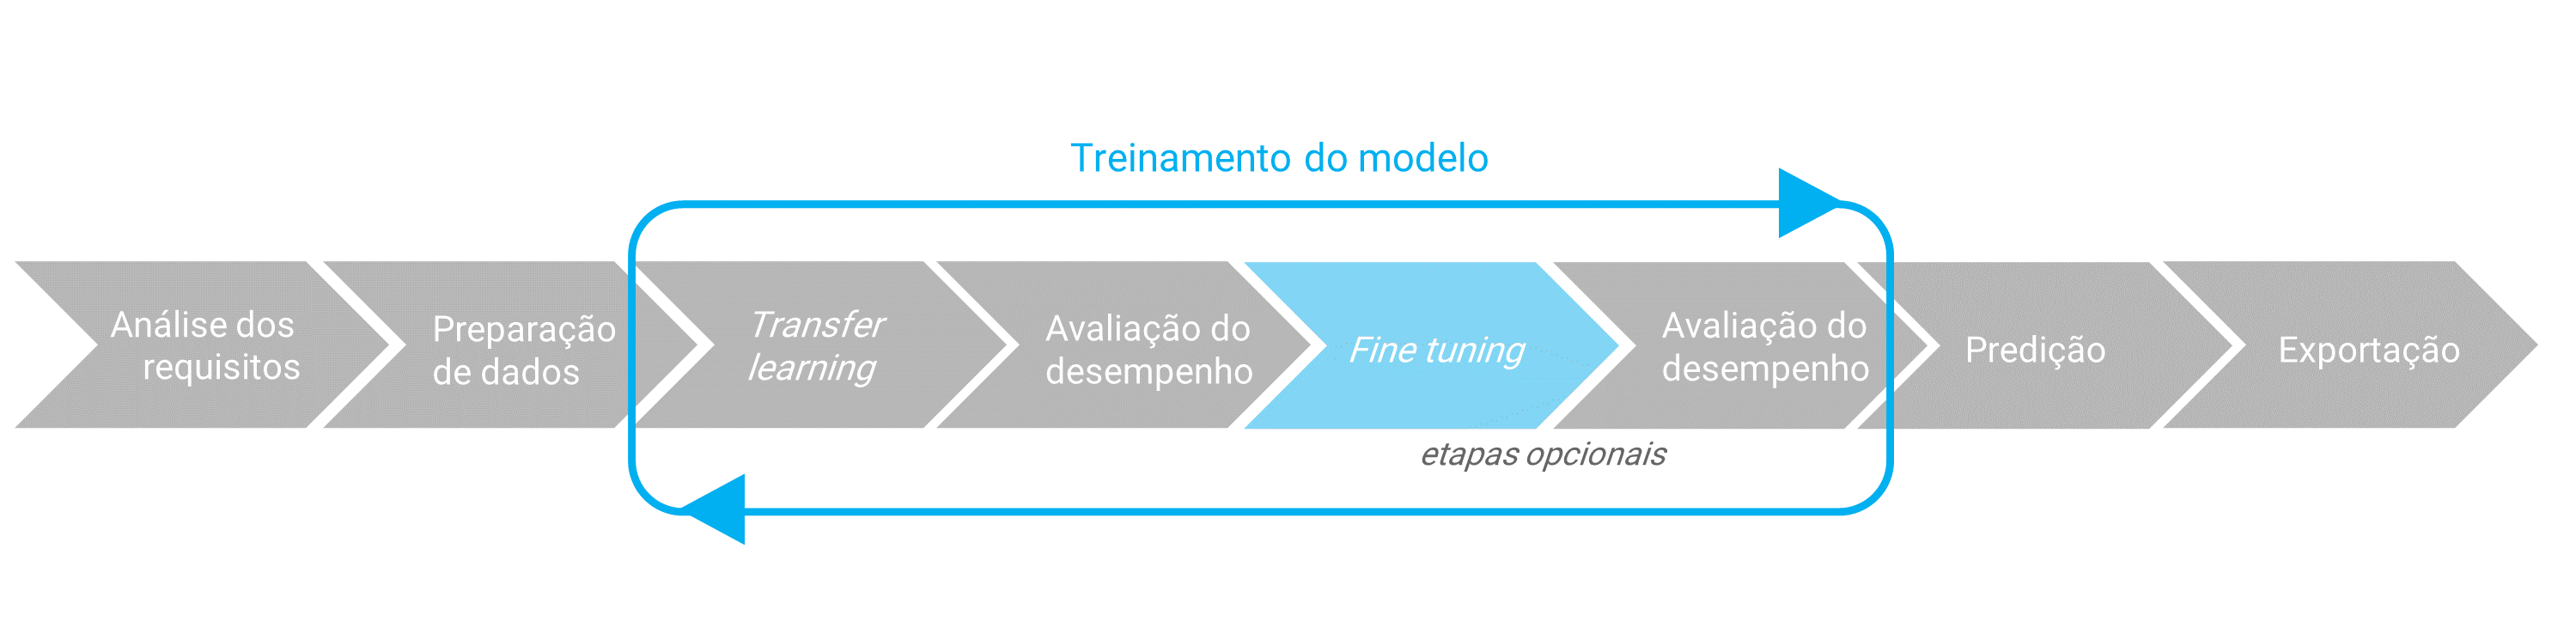

Unfreeze a rede neural

In [ ]:
learn.unfreeze()

Identificando a melhor taxa de aprendizagem
usando valley seguindo https://docs.fast.ai/callback.schedule.html
(recentemente começaram sugerir de usar o valley e não mais o steep ou minimum como ponto para a melhor taxa de aprendizagem) (Explicação do Zachary Mueller aqui: https://forums.fast.ai/t/new-lr-finder-output/89236/2)


Converter o resultado da taxa de aprendizagem sugerida (SuggestedLR) usando valley (que é um tensor) em float

In [ ]:
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
print("lr_min = ",lr_min)
print("lr_steep = ",lr_steep)
print("lr_valley = ",lr_valley)
print("lr_slide = ",lr_slide)

#Choosing a lr between the valley and the slide is a really goodv

In [ ]:
#Terminar o run no wandb.ai

wandb.finish()

## **VALIDAÇÃO DO MODELO EFFICIENTNETB0**

In [128]:
from fastai.vision import *

In [134]:
learn = learn.load('FastAI_timm_COM_TESTE_EFFICIENTNETB0_LEARNING_RATE_001_EPOCHS_50')

In [135]:
#caminho para o diretório de teste
path_test = "test-set"

In [136]:
from fastai.vision.all import *
from fastai.vision.data import ImageBlock, CategoryBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, parent_label, RandomSplitter
from PIL import Image

#DataBlock para as imagens de teste
test_datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                           get_items=get_image_files,
                           splitter=RandomSplitter(valid_pct=0, seed=42), # Todas as imagens para 'train' e nenhuma para 'valid' Aqui é teste so
                           get_y=parent_label,
                           item_tfms=Resize(460),
                           batch_tfms=aug_transforms(size=224))

#DataLoader para as imagens de teste
test_dls = test_datablock.dataloaders(path_test, bs=16) # bs é o tamanho do lote

# Faz as previsões
preds, targs = learn.get_preds(dl=test_dls.train) # preds são as previsões; targs são as etiquetas reais (se houver)

# Decodificar as previsões para obter as classes previstas
decoded_preds = [test_dls.vocab[i] for i in preds.argmax(dim=-1)]

#print(decoded_preds) #vetor das classes previstas

In [137]:
from sklearn.metrics import accuracy_score, classification_report

# Converte as etiquetas verdadeiras para suas formas decodificadas (nomes das classes)
decoded_targs = [test_dls.vocab[i] for i in targs]

# Calcular a acurácia
acc = accuracy_score(decoded_targs, decoded_preds)
print(f"Acurácia: {acc * 100:.2f}%")

# Calcular outras métricas (precisão, recall, F1-score)
report = classification_report(decoded_targs, decoded_preds)
print("Relatório de Classificação:")
print(report)

Acurácia: 87.33%
Relatório de Classificação:
                precision    recall  f1-score   support

       acharia       0.94      1.00      0.97        30
     arctiidae       0.79      0.90      0.84        30
     automeris       0.85      0.97      0.91        30
       hylesia       0.84      0.87      0.85        30
       lonomia       0.91      0.67      0.77        30
    megalopyge       0.74      0.87      0.80        30
   nao-lagarta       0.94      0.97      0.95        30
nao-peconhenta       0.92      0.77      0.84        30
     phobetron       0.96      0.90      0.93        30
       podalia       0.89      0.83      0.86        30

      accuracy                           0.87       300
     macro avg       0.88      0.87      0.87       300
  weighted avg       0.88      0.87      0.87       300



In [138]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate

# Calcular a acurácia geral
acc = accuracy_score(decoded_targs, decoded_preds)
print(f"Acurácia: {acc * 100:.2f}%")

# Calcular o relatório de classificação
report = classification_report(decoded_targs, decoded_preds)
print("Relatório de Classificação:")
print(report)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(decoded_targs, decoded_preds)
print("Matriz de Confusão:")
print(conf_matrix)

# Calcular a acurácia por classe
accuracy_per_class = {}
for i, label in enumerate(test_dls.vocab):
    accuracy_per_class[label] = conf_matrix[i][i] / sum(conf_matrix[i])

# Organizar os resultados em uma lista de tuplas (label, accuracy)
results = [(label, accuracy) for label, accuracy in accuracy_per_class.items()]

# Imprimir a tabela
print("Acurácia por Classe:")
print(tabulate(results, headers=["Classe", "Acurácia"]))

Acurácia: 87.33%
Relatório de Classificação:
                precision    recall  f1-score   support

       acharia       0.94      1.00      0.97        30
     arctiidae       0.79      0.90      0.84        30
     automeris       0.85      0.97      0.91        30
       hylesia       0.84      0.87      0.85        30
       lonomia       0.91      0.67      0.77        30
    megalopyge       0.74      0.87      0.80        30
   nao-lagarta       0.94      0.97      0.95        30
nao-peconhenta       0.92      0.77      0.84        30
     phobetron       0.96      0.90      0.93        30
       podalia       0.89      0.83      0.86        30

      accuracy                           0.87       300
     macro avg       0.88      0.87      0.87       300
  weighted avg       0.88      0.87      0.87       300

Matriz de Confusão:
[[30  0  0  0  0  0  0  0  0  0]
 [ 0 27  0  0  0  1  0  2  0  0]
 [ 0  0 29  1  0  0  0  0  0  0]
 [ 0  1  0 26  2  0  1  0  0  0]
 [ 0  2  4  3 20

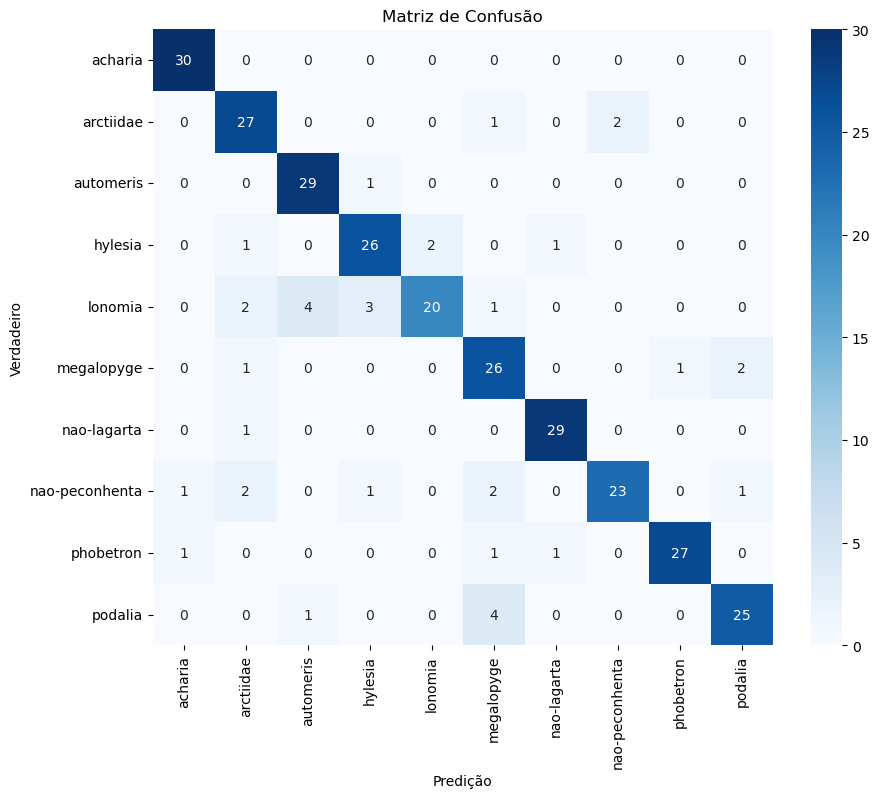

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(decoded_targs, decoded_preds)

# Transformar em um DataFrame para facilitar a visualização
class_names = test_dls.vocab
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.show()

**Setup da biblioteca TIMM**

A biblioteca TIMM fornece acesso a mais do que 200 modelos pretreinados

https://timm.fast.ai/

Infos sobre as implementações dos modelos: https://rwightman.github.io/pytorch-image-models/models/

In [ ]:
!pip install timm

In [ ]:
import timm

In [ ]:
timm.__version__

## **TREINANDO O MobileNetv3**

In [ ]:
from fastai.vision.all import *

In [113]:
#Criar o modelo a partir da biblioteca TIMM https://timm.fast.ai/create_model

model_transfer = timm.create_model('mobilenetv3_small_100', pretrained=True,num_classes=10)

In [ ]:
cbs=[ShowGraphCallback,ActivationStats(with_hist=True),SaveModelCallback]

In [114]:
#Criar o Learner no fastai
#cbs=[ShowGraphCallback,ActivationStats(with_hist=True),SaveModelCallback('monitor='accuracy',fname='/content/gdrive/Shareddrives/CnE_Mosquitos/JupyterNotebooks/ProjetoMLMosquito/Export/bestResnet18Model')]

#Wandb.ai callback: https://docs.fast.ai/callback.wandb.html

learn = Learner(dls, model_transfer,metrics=accuracy, cbs=ShowGraphCallback)

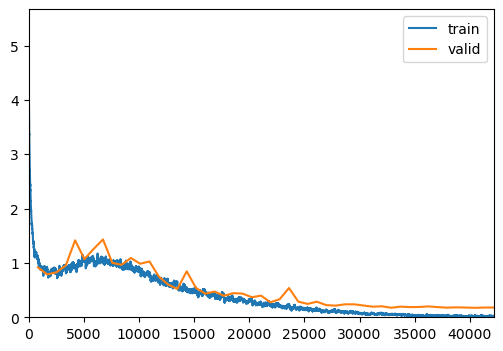

In [91]:
#Treinar o modelo com fit_one_cycle

learn.fit_one_cycle(50, 1e-3)

In [92]:
learn.save('FastAI_timm_COM_TESTE_MOBILENETV3_LEARNING_RATE_001_EPOCHS_50')

Path('models/FastAI_timm_COM_TESTE_MOBILENETV3_LEARNING_RATE_001_EPOCHS_50.pth')

In [115]:
learn.load('FastAI_timm_COM_TESTE_MOBILENETV3_LEARNING_RATE_001_EPOCHS_50')

## **AVALIAÇÃO DO MODELO CRIADO MobileNetv3**


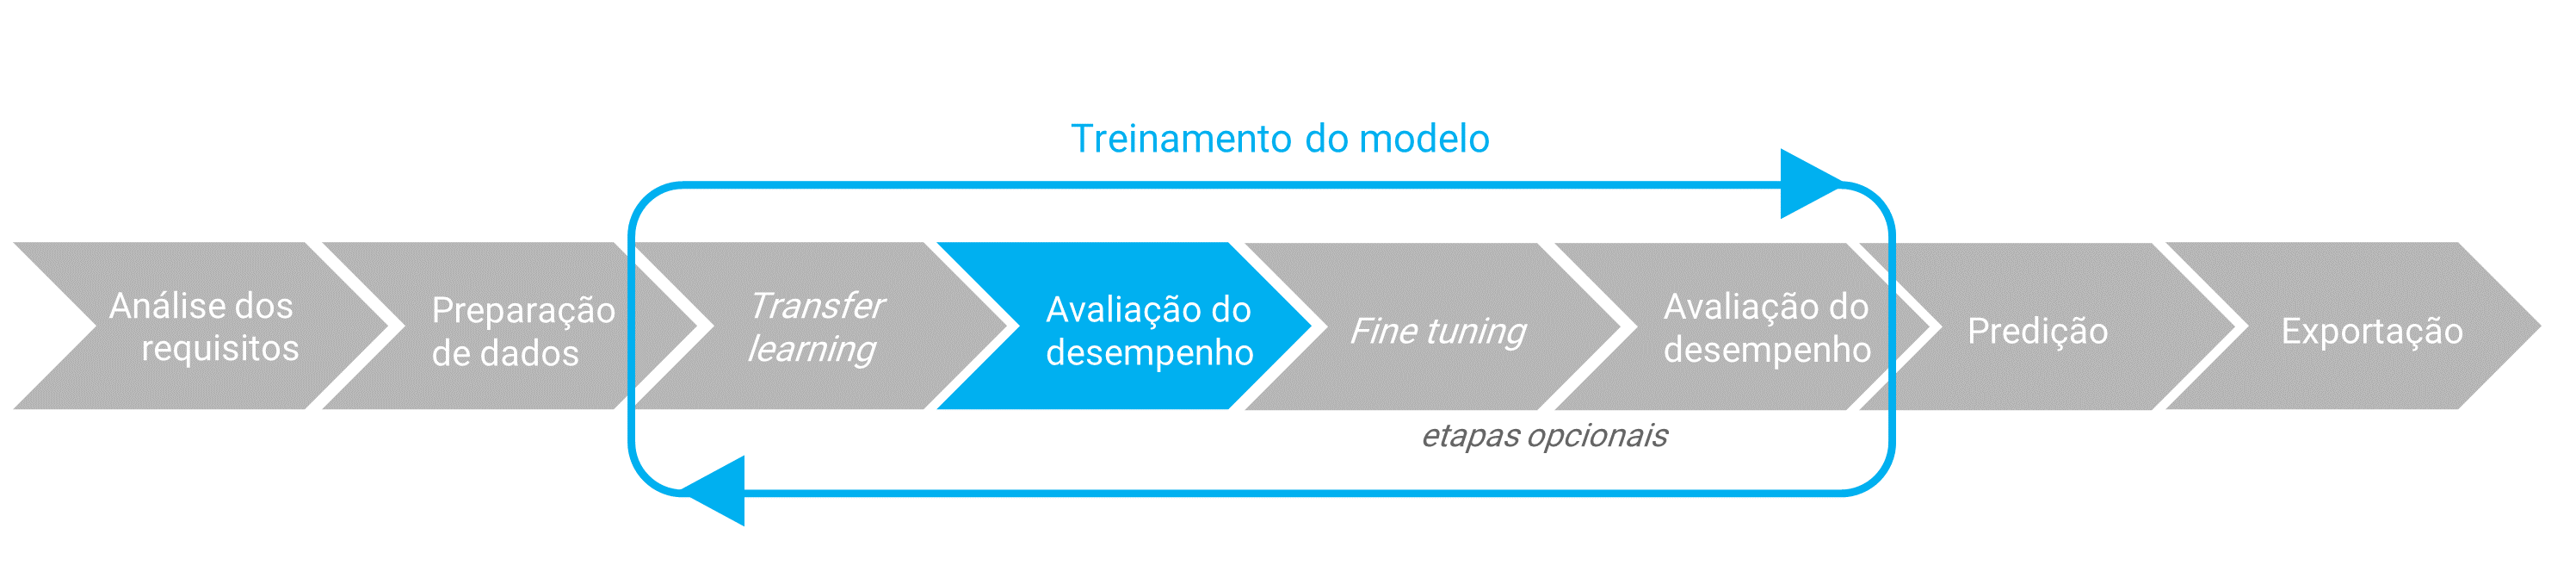

**Avaliação da acurácia, precisão, recall e F1 score**

Accuracy tells you how many times the ML model was correct overall. Precision is how good the model is at predicting a specific category. Recall tells you how many times the model was able to detect a specific category.

Mais infos: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

https://www.mage.ai/blog/definitive-guide-to-accuracy-precision-recall-for-product-developers

https://regenerativetoday.com/learn-precision-recall-and-f1-score-of-multiclass-classification-in-depth/


In [116]:
interp = ClassificationInterpretation.from_learner(learn)
interp.print_classification_report()

                precision    recall  f1-score   support

       acharia       0.99      0.97      0.98       148
     arctiidae       0.96      0.96      0.96       170
     automeris       0.96      0.96      0.96       140
       hylesia       0.97      0.94      0.95       176
       lonomia       1.00      1.00      1.00       149
    megalopyge       0.93      0.87      0.90       134
   nao-lagarta       0.95      0.96      0.96       134
nao-peconhenta       0.91      0.95      0.93       125
     phobetron       0.99      0.98      0.98       152
       podalia       0.90      0.94      0.92       172

      accuracy                           0.95      1500
     macro avg       0.95      0.95      0.95      1500
  weighted avg       0.95      0.95      0.95      1500



INFO: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9

Matriz de confusão

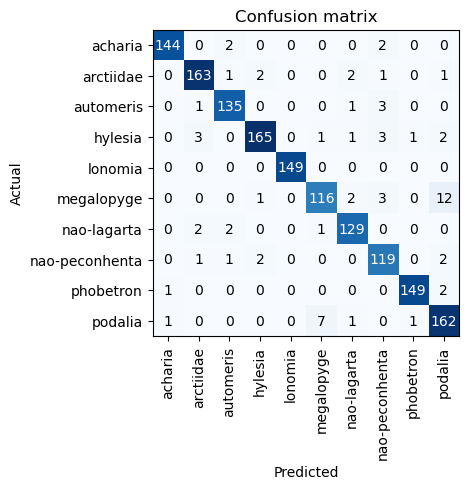

In [117]:
interp.plot_confusion_matrix()

https://search.r-project.org/CRAN/refmans/fastai/html/most_confused.html


In [ ]:
interp.most_confused(min_val=2)

In [ ]:
interp.plot_top_losses(9, figsize=(15,10))

**Limpeza de dados**

IMPORTANTE: As imagens deletadas aqui serão deletadas permanentemente na origem do conjunto de dados no Google Drive!

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

## **FINE-TUNING DO MODELO CRIADO MobileNetv3**
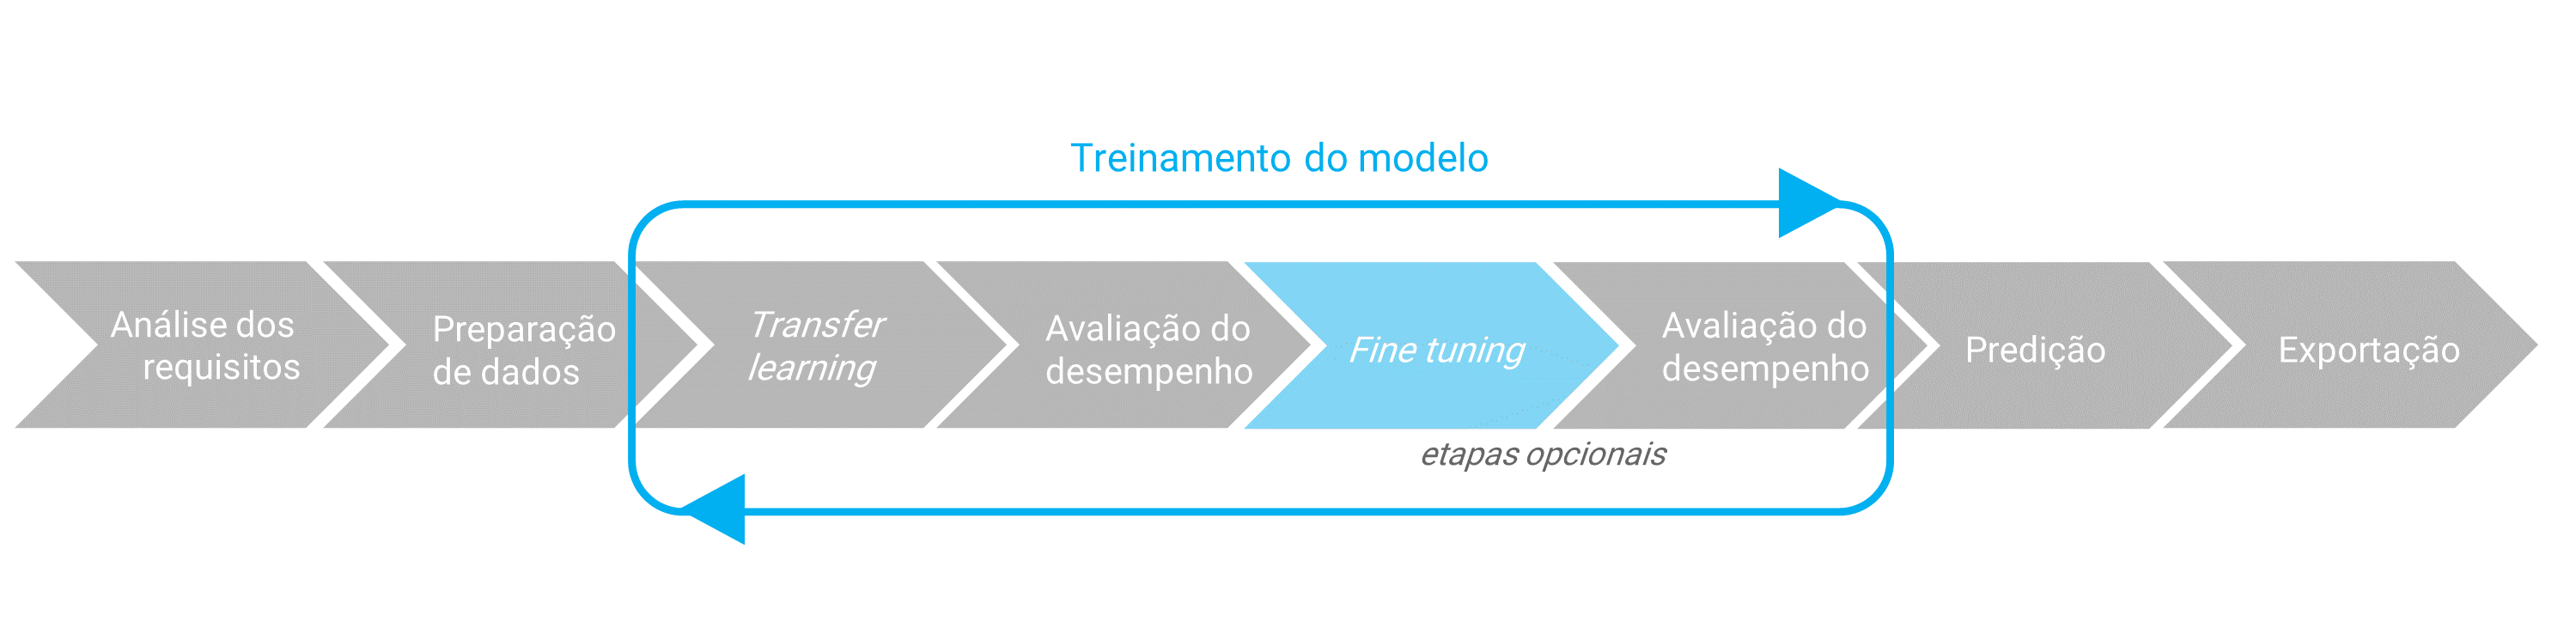

Unfreeze a rede neural

In [ ]:
learn.unfreeze()

Identificando a melhor taxa de aprendizagem
usando valley seguindo https://docs.fast.ai/callback.schedule.html
(recentemente começaram sugerir de usar o valley e não mais o steep ou minimum como ponto para a melhor taxa de aprendizagem) (Explicação do Zachary Mueller aqui: https://forums.fast.ai/t/new-lr-finder-output/89236/2)


Converter o resultado da taxa de aprendizagem sugerida (SuggestedLR) usando valley (que é um tensor) em float

In [ ]:
lr_min, lr_steep, lr_valley, lr_slide = learn.lr_find(suggest_funcs=(minimum, steep, valley, slide))
print("lr_min = ",lr_min)
print("lr_steep = ",lr_steep)
print("lr_valley = ",lr_valley)
print("lr_slide = ",lr_slide)

#Choosing a lr between the valley and the slide is a really goodv

In [ ]:
#Terminar o run no wandb.ai

wandb.finish()

## **VALIDAÇÃO DO MODELO MobileNetv3**

In [118]:
from fastai.vision import *

In [119]:
learn = learn.load('FastAI_timm_COM_TESTE_MOBILENETV3_LEARNING_RATE_001_EPOCHS_50')

In [120]:
#caminho para o diretório de teste
path_test = "test-set"

In [170]:
from fastai.vision.all import *
from fastai.vision.data import ImageBlock, CategoryBlock
from fastai.data.external import untar_data, URLs
from fastai.data.transforms import get_image_files, parent_label, RandomSplitter
from PIL import Image

#DataBlock para as imagens de teste
test_datablock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                           get_items=get_image_files,
                           splitter=RandomSplitter(valid_pct=0, seed=42), # Todas as imagens para 'train' e nenhuma para 'valid' Aqui é teste so
                           get_y=parent_label,
                           item_tfms=Resize(460),
                           batch_tfms=aug_transforms(size=224))

#DataLoader para as imagens de teste
test_dls = test_datablock.dataloaders(path_test, bs=16) # bs é o tamanho do lote

# Faz as previsões
preds, targs = learn.get_preds(dl=test_dls.train) # preds são as previsões; targs são as etiquetas reais (se houver)

# Decodificar as previsões para obter as classes previstas
decoded_preds = [test_dls.vocab[i] for i in preds.argmax(dim=-1)]

print(decoded_preds) #vetor das classes previstas

['phobetron', 'hylesia', 'podalia', 'acharia', 'phobetron', 'arctiidae', 'nao-peconhenta', 'automeris', 'nao-lagarta', 'hylesia', 'phobetron', 'phobetron', 'automeris', 'arctiidae', 'megalopyge', 'acharia', 'acharia', 'hylesia', 'nao-lagarta', 'megalopyge', 'acharia', 'hylesia', 'hylesia', 'lonomia', 'megalopyge', 'arctiidae', 'podalia', 'podalia', 'automeris', 'phobetron', 'acharia', 'hylesia', 'acharia', 'podalia', 'nao-peconhenta', 'automeris', 'acharia', 'acharia', 'automeris', 'podalia', 'arctiidae', 'nao-lagarta', 'nao-lagarta', 'automeris', 'phobetron', 'phobetron', 'nao-lagarta', 'nao-peconhenta', 'nao-peconhenta', 'acharia', 'lonomia', 'nao-lagarta', 'nao-lagarta', 'lonomia', 'acharia', 'acharia', 'megalopyge', 'nao-peconhenta', 'acharia', 'arctiidae', 'hylesia', 'lonomia', 'phobetron', 'megalopyge', 'podalia', 'nao-peconhenta', 'nao-peconhenta', 'automeris', 'arctiidae', 'automeris', 'megalopyge', 'acharia', 'hylesia', 'automeris', 'lonomia', 'podalia', 'automeris', 'megalopy

In [122]:
from sklearn.metrics import accuracy_score, classification_report

# Converte as etiquetas verdadeiras para suas formas decodificadas (nomes das classes)
decoded_targs = [test_dls.vocab[i] for i in targs]

# Calcular a acurácia
acc = accuracy_score(decoded_targs, decoded_preds)
print(f"Acurácia: {acc * 100:.2f}%")

# Calcular outras métricas (precisão, recall, F1-score)
report = classification_report(decoded_targs, decoded_preds)
print("Relatório de Classificação:")
print(report)

Acurácia: 84.33%
Relatório de Classificação:
                precision    recall  f1-score   support

       acharia       0.88      0.97      0.92        30
     arctiidae       0.66      0.70      0.68        30
     automeris       0.81      0.97      0.88        30
       hylesia       0.84      0.87      0.85        30
       lonomia       0.83      0.67      0.74        30
    megalopyge       0.65      0.80      0.72        30
   nao-lagarta       1.00      0.97      0.98        30
nao-peconhenta       0.96      0.77      0.85        30
     phobetron       1.00      0.87      0.93        30
       podalia       0.93      0.87      0.90        30

      accuracy                           0.84       300
     macro avg       0.85      0.84      0.84       300
  weighted avg       0.85      0.84      0.84       300



In [123]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate

# Calcular a acurácia geral
acc = accuracy_score(decoded_targs, decoded_preds)
print(f"Acurácia: {acc * 100:.2f}%")

# Calcular o relatório de classificação
report = classification_report(decoded_targs, decoded_preds)
print("Relatório de Classificação:")
print(report)

# Calcular a matriz de confusão
conf_matrix = confusion_matrix(decoded_targs, decoded_preds)
print("Matriz de Confusão:")
print(conf_matrix)

# Calcular a acurácia por classe
accuracy_per_class = {}
for i, label in enumerate(test_dls.vocab):
    accuracy_per_class[label] = conf_matrix[i][i] / sum(conf_matrix[i])

# Organizar os resultados em uma lista de tuplas (label, accuracy)
results = [(label, accuracy) for label, accuracy in accuracy_per_class.items()]

# Imprimir a tabela
print("Acurácia por Classe:")
print(tabulate(results, headers=["Classe", "Acurácia"]))

Acurácia: 84.33%
Relatório de Classificação:
                precision    recall  f1-score   support

       acharia       0.88      0.97      0.92        30
     arctiidae       0.66      0.70      0.68        30
     automeris       0.81      0.97      0.88        30
       hylesia       0.84      0.87      0.85        30
       lonomia       0.83      0.67      0.74        30
    megalopyge       0.65      0.80      0.72        30
   nao-lagarta       1.00      0.97      0.98        30
nao-peconhenta       0.96      0.77      0.85        30
     phobetron       1.00      0.87      0.93        30
       podalia       0.93      0.87      0.90        30

      accuracy                           0.84       300
     macro avg       0.85      0.84      0.84       300
  weighted avg       0.85      0.84      0.84       300

Matriz de Confusão:
[[29  0  0  0  0  1  0  0  0  0]
 [ 1 21  1  2  2  2  0  0  0  1]
 [ 0  0 29  0  0  1  0  0  0  0]
 [ 0  2  0 26  2  0  0  0  0  0]
 [ 1  2  5  2 20

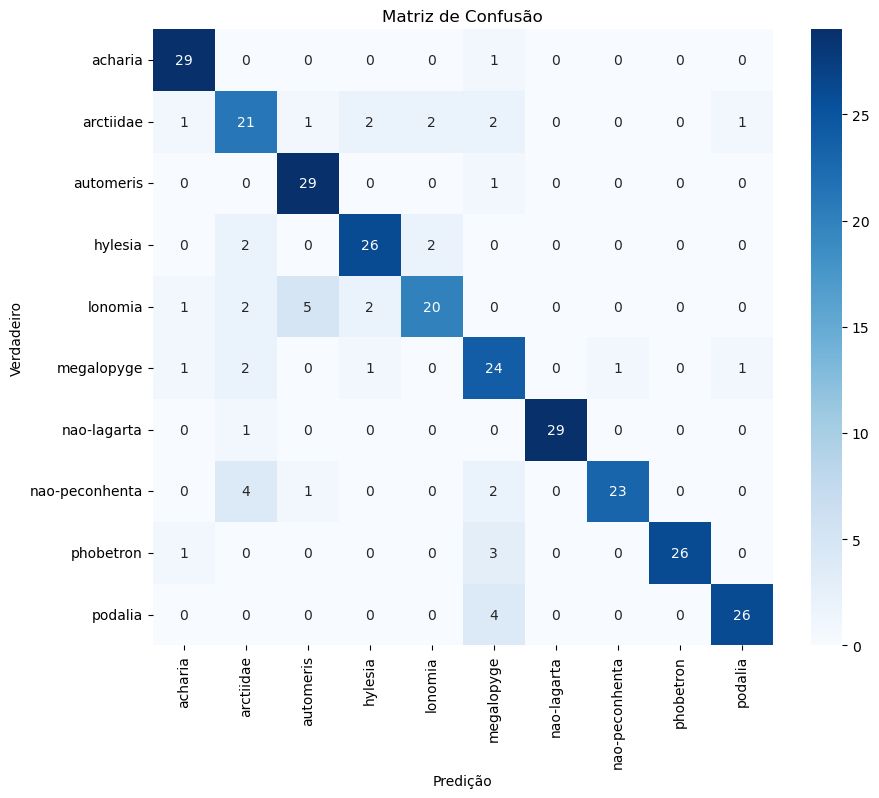

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm = confusion_matrix(decoded_targs, decoded_preds)

# Transformar em um DataFrame para facilitar a visualização
class_names = test_dls.vocab
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.show()

In [23]:
test = [[184,3,10,4,0,2,1,15,1,5],
[8,159,5,13,3,11,1,16,1,8],
[6,10,179,10,2,4,1,9,4,0],
[9,11,11,167,5,2,1,15,4,0],
[0,1,3,2,218,0,0,0,1,0],
[14,3,5,6,3,152,1,10,9,22],
[1,0,4,0,0,6,207,1,5,1],
[12,3,10,6,0,8,3,10,177,2,4],
[10,1,1,2,2,8,3,10,180,8],
[9,6,1,1,2,20,2,8,2,174]]
for x in test:
    print(len(x))
print(sum([len(x) for x in test]))

10
10
10
10
10
10
10
11
10
10
101


In [24]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate

cm = np.array(
    [[184,3,10,4,0,2,1,15,1,5],
[8,159,5,13,3,11,1,16,1,8],
[6,10,179,10,2,4,1,9,4,0],
[9,11,11,167,5,2,1,15,4,0],
[0,1,3,2,218,0,0,0,1,0],
[14,3,5,6,3,152,1,10,9,22],
[1,0,4,0,0,6,207,1,5,1],
[12,3,10,6,0,8,3,177,2,4],
[10,1,1,2,2,8,3,10,180,8],
[9,6,1,1,2,20,2,8,2,174]]
)

TP = np.diag(cm)
print(TP)

FP = np.sum(cm, axis=0) - TP
print(FP)

FN = np.sum(cm, axis=1) - TP
print(FN)


num_classes = 10
sample_for_class = 225
TN = []
for i in range(num_classes):
    temp = np.delete(cm, i, 0)    # delete ith row
    temp = np.delete(temp, i, 1)  # delete ith column
    TN.append(sum(sum(temp)))
print(TN)

l = num_classes*sample_for_class
for i in range(num_classes):
    print(TP[i] + FP[i] + FN[i] + TN[i] == l)

precision = TP/(TP+FP)
recall = TP/(TP+FN)
accuracy = TP/sample_for_class

general_precision =sum(precision)/num_classes
general_recall = sum(recall)/num_classes
general_acc = sum(accuracy)/num_classes

print(f"acuracia por classe: {accuracy}")

print(f"accuracia total: {general_acc}")
print(f"precisao: {general_precision}")
print(f"recall: {general_recall}")
print(f"F1-Score: {2*general_precision*general_recall/(general_precision+general_recall)}")


[184 159 179 167 218 152 207 177 180 174]
[69 38 50 44 17 61 13 84 29 48]
[41 66 46 58  7 73 18 48 45 51]
[1956, 1987, 1975, 1981, 2008, 1964, 2012, 1941, 1996, 1977]
True
True
True
True
True
True
True
True
True
True
acuracia por classe: [0.81777778 0.70666667 0.79555556 0.74222222 0.96888889 0.67555556
 0.92       0.78666667 0.8        0.77333333]
accuracia total: 0.7986666666666667
precisao: 0.8012880320530709
recall: 0.7986666666666667
F1-Score: 0.7999752019376655


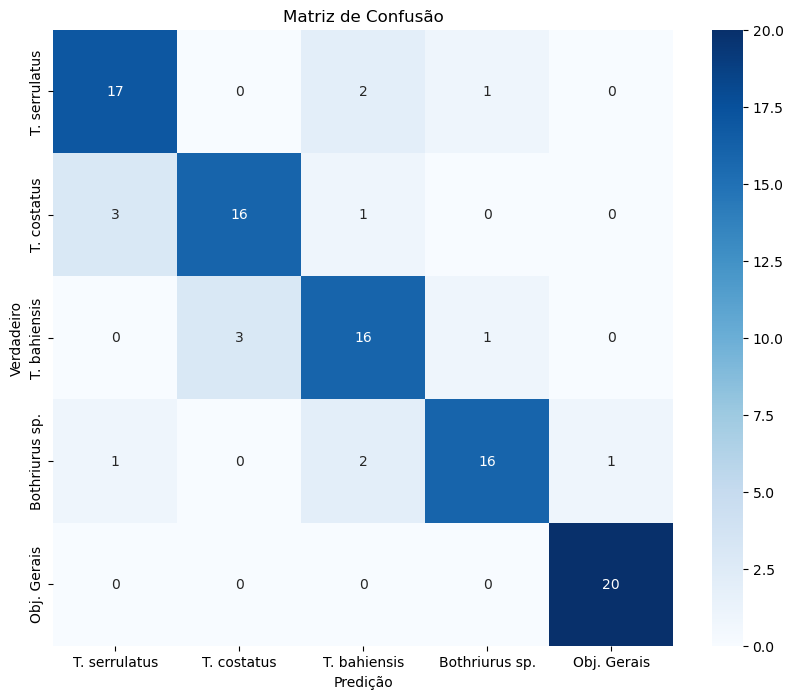

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calcular a matriz de confusão
cm =    [[17,	0,	2,	1,	0],
[3,	16,	1,	0,	0],
[0,	3,	16,	1,	0],
[1,	0,	2,	16,	1],
[0,	0,	0,	0,	20]
]


# Transformar em um DataFrame para facilitar a visualização
class_names = ['T. serrulatus',	'T. costatus',	'T. bahiensis',	'Bothriurus sp.'	
,               'Obj. Gerais'
]
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)

# Criar heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_cm, annot=True, fmt="d", cmap='Blues')
plt.title("Matriz de Confusão")
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.show()